In [184]:
#Importing the important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import scipy.stats as sp
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import type_of_target
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from warnings import filterwarnings
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_pinball_loss, d2_pinball_score, d2_absolute_error_score
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import mlflow
import mlflow.sklearn
from markupsafe import escape
import lightgbm
from lightgbm import LGBMRegressor
filterwarnings('ignore')

pd.pandas.set_option("display.max_columns", None)#setting the display for the columns 
pd.pandas.set_option("display.max_rows",None)


In [2]:
#Loading the data
os.chdir(r"C:\Users\riama\Downloads\house-prices-advanced-regression-techniques")

In [3]:
#Reading the data
dataset= pd.read_csv("train.csv")
data_test= pd.read_csv("test.csv")

In [4]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dataset.shape

(1460, 81)

In [7]:
#As such it has 1460 rows along with the 81 columns

In [8]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#As such there are missing values hence we will treat them later

In [10]:
#Let's analyse the data 

In [11]:
#Here I will first seperate the numerical, categorical to analyse the data seperately.

In [12]:
#First we will drop the Id as we do not need this
dataset=dataset.drop(columns=["Id"])

#### EDA (Univariate, Bivariate, Multivariate)

In [13]:
#Numerical Variables

In [14]:
num_data= dataset.dtypes[dataset.dtypes!="object"].index
dataset[num_data].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [15]:
print(f"The length of the numerical variable in a dataset is {len(num_data)}")

The length of the numerical variable in a dataset is 37


In [16]:
#As from above I can see that there are date variables also along with there are some discrete variable also

In [17]:
year_data= [features for features in dataset.columns if "Yr" in features or "Year" in features]
year_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Can see that there are 4 years given we can calculate the age of the house using yrsold and yearbuilt and can do some analysis accordingly

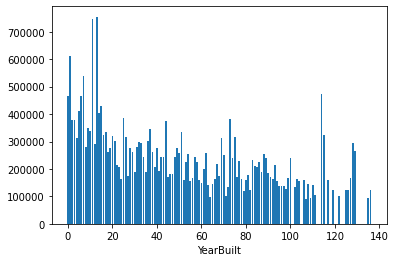

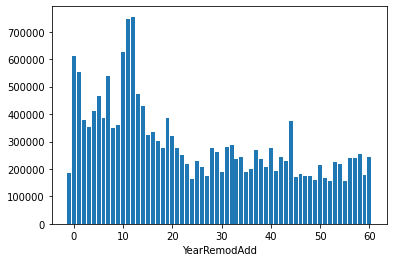

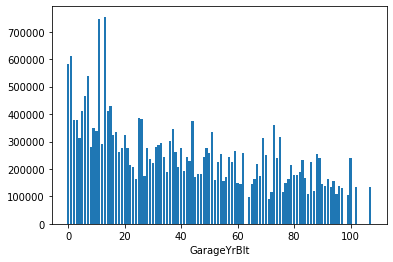

In [18]:
data= dataset.copy()
#Let's do some analysation 
for yr in year_data:
    if yr!="YrSold":
        data[yr]=data["YrSold"]-data[yr]
        plt.bar(data[yr], data["SalePrice"])
        plt.xlabel(yr)
        plt.show()
        

From the above analysis, we can say that the house which has been built new is selling at high prices and the old house is selling at a low rate.

In [19]:
#As there are discrete values also lets check how many are there
dis_data= [dis for dis in num_data if len(dataset[dis].unique())<20 and dis not in year_data + ["Id"]]
dis_data

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

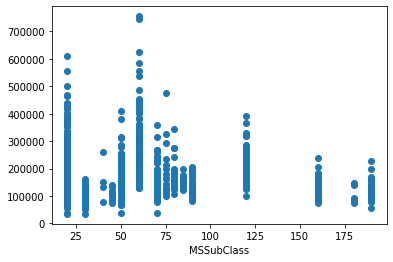

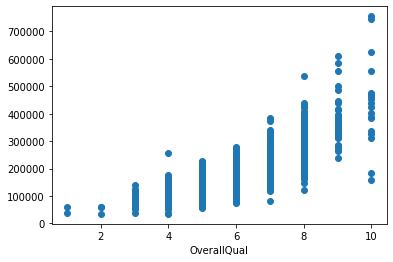

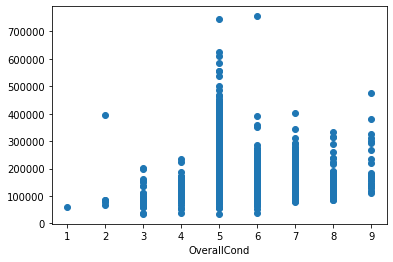

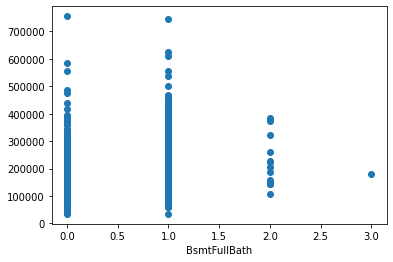

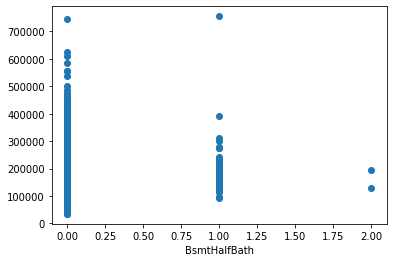

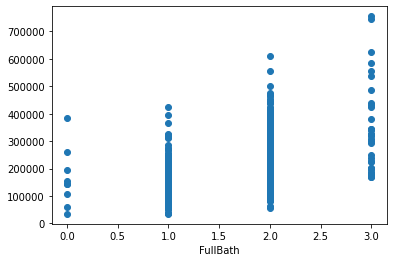

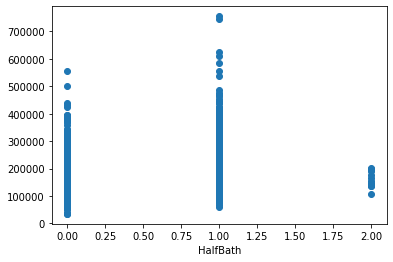

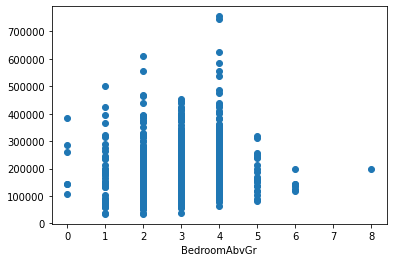

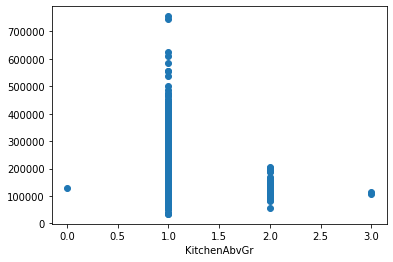

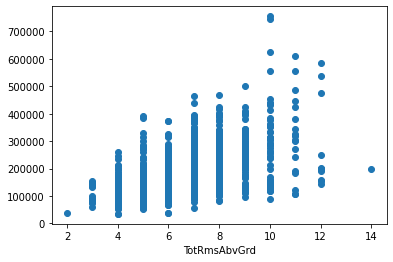

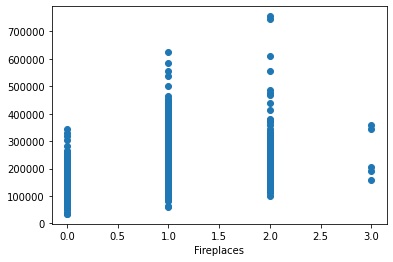

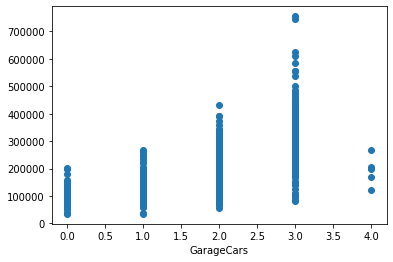

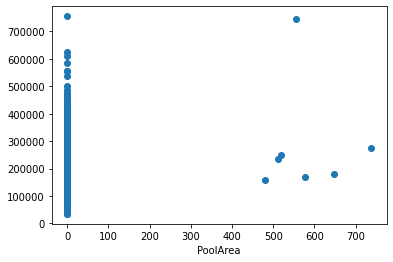

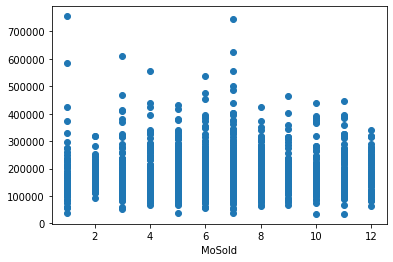

In [20]:
#As such these are the records that are basically discrete, lets analyse them 
for feat in dis_data:
    data=dataset.copy()
    plt.scatter(data[feat],data["SalePrice"])
    plt.xlabel(feat)
    plt.show()
    

In [21]:
#From here we can analyze the data that there are some variables on which it does not only depend on sale price variable.

In [22]:
dataset["PoolArea"].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [23]:
dataset["PoolArea"].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [24]:
#Most of the values of PoolArea are at 0.

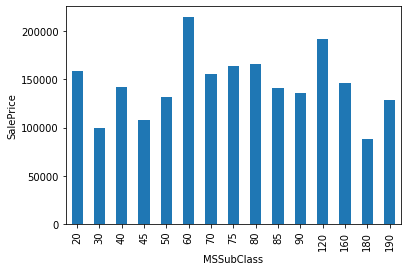

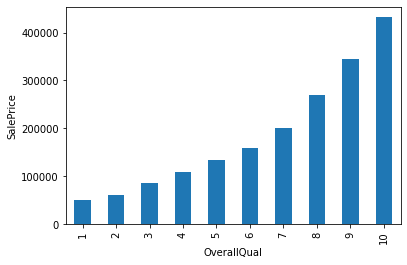

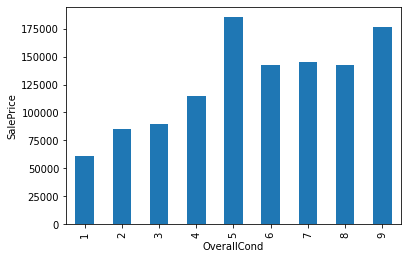

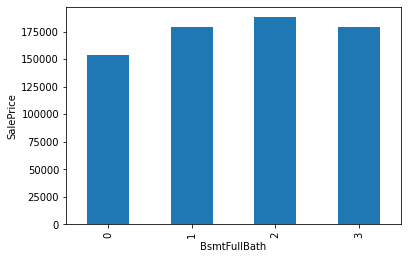

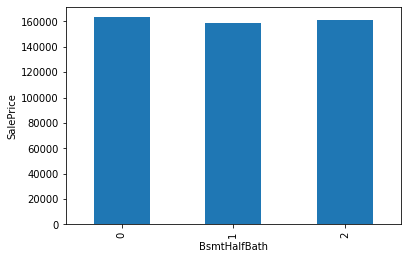

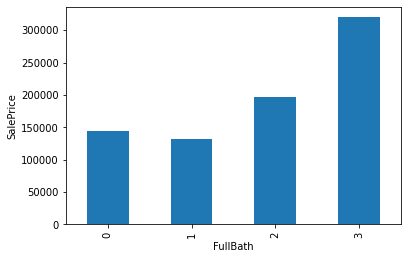

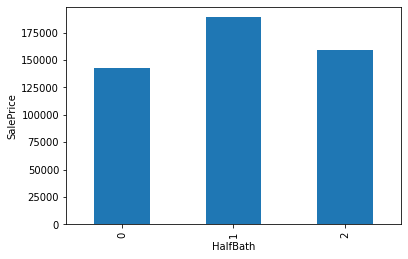

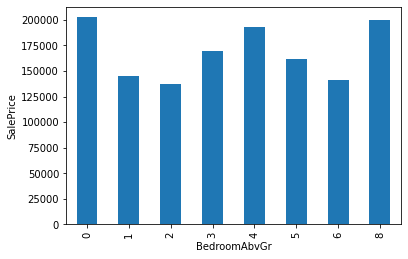

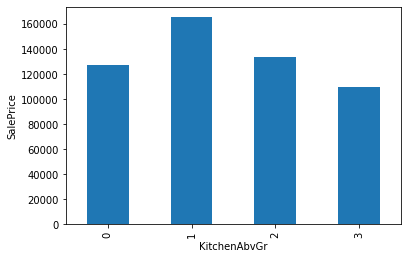

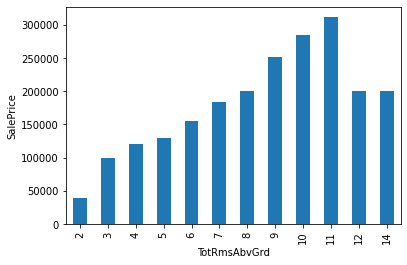

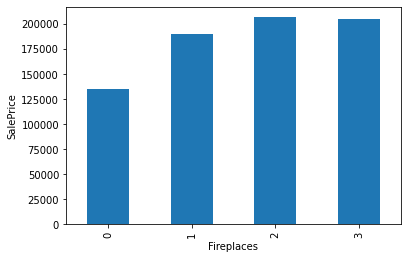

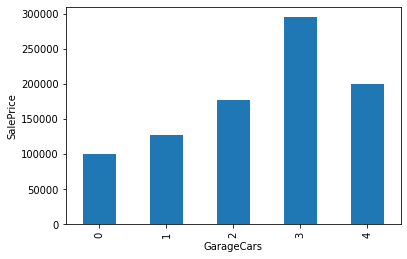

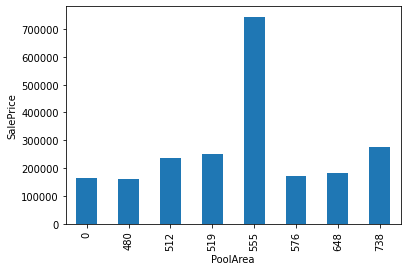

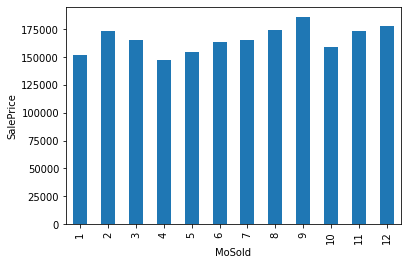

In [25]:
#Now let's analyse the discrete variable using median also
for feat in dis_data:
    data=dataset.copy()
    data.groupby(feat)["SalePrice"].median().plot(kind="bar")
    plt.xlabel(feat)
    plt.ylabel("SalePrice")
    plt.show()

In [26]:
#This will give the more accurate result

Checking some of the discrete variable's correlation with the y variable

In [27]:
dataset["PoolArea"].corr(dataset["SalePrice"]) #it shows a very weak correlation.

0.09240354949187322

In [28]:
dataset["OverallQual"].corr(dataset["SalePrice"]) #it shows a strong correlation.

0.7909816005838046

In [29]:
dataset["MSSubClass"].corr(dataset["SalePrice"])#it shows a very weak correlation

-0.08428413512659523

In [30]:
dataset["OverallCond"].corr(dataset["SalePrice"]) #very weak

-0.077855894048678

In [31]:
dataset["BsmtFullBath"].corr(dataset["SalePrice"]) # weak correlation

0.22712223313149404

In [32]:
dataset["FullBath"].corr(dataset["SalePrice"]) #average correlation

0.5606637627484454

In [33]:
#now will analyse the continous variables
cont_data= [feat for feat in num_data if feat not in dis_data+ year_data+["Id"]]
len(cont_data)

19

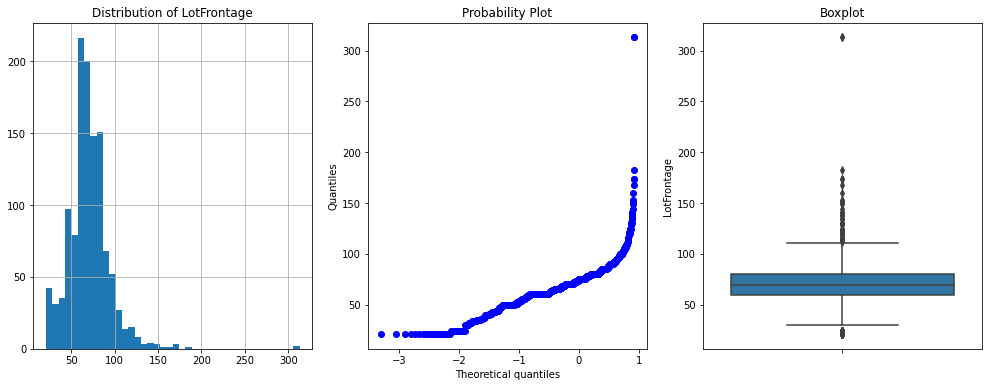

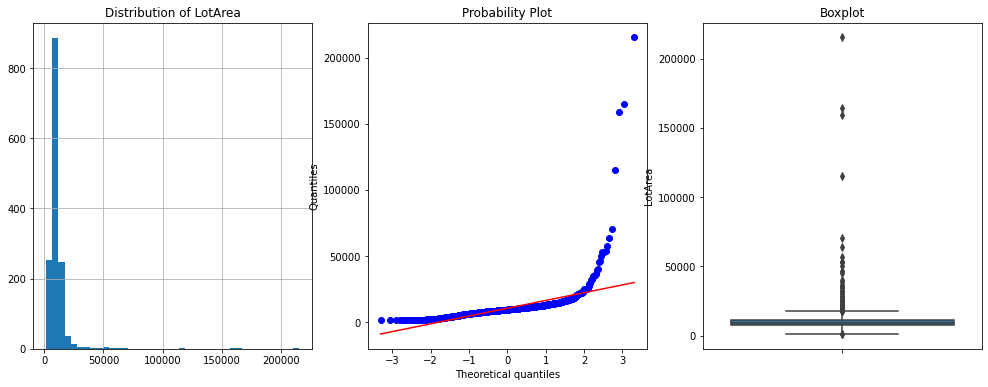

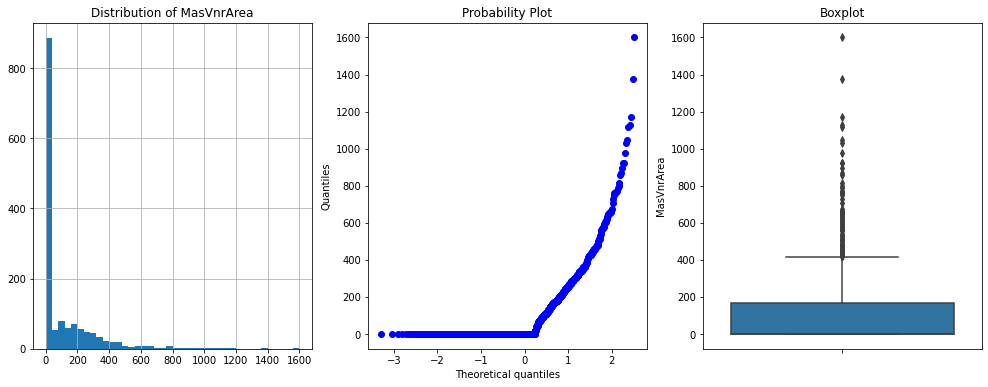

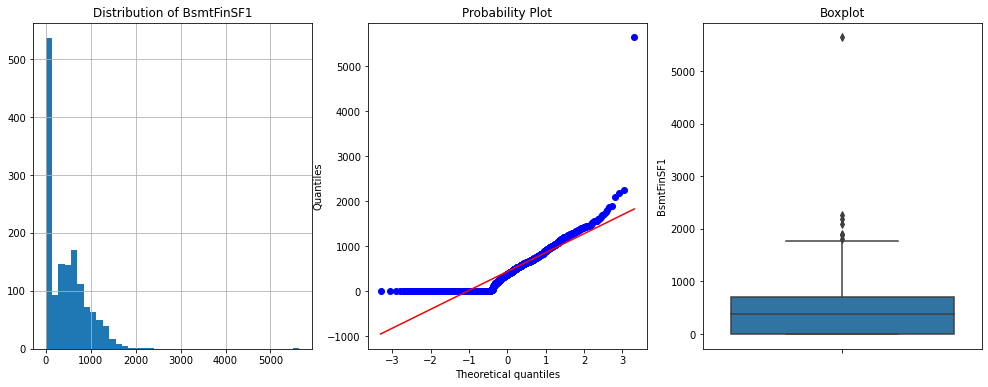

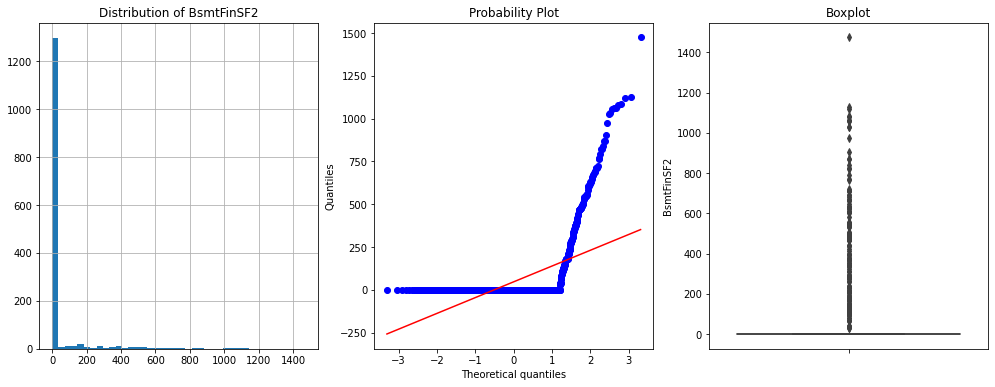

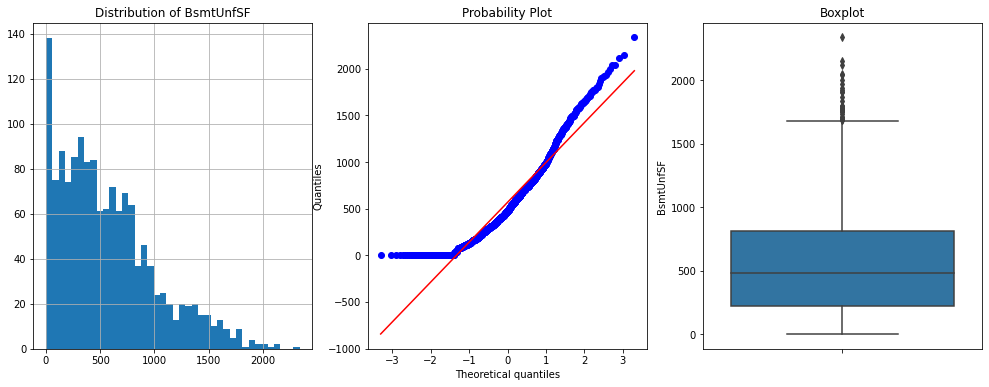

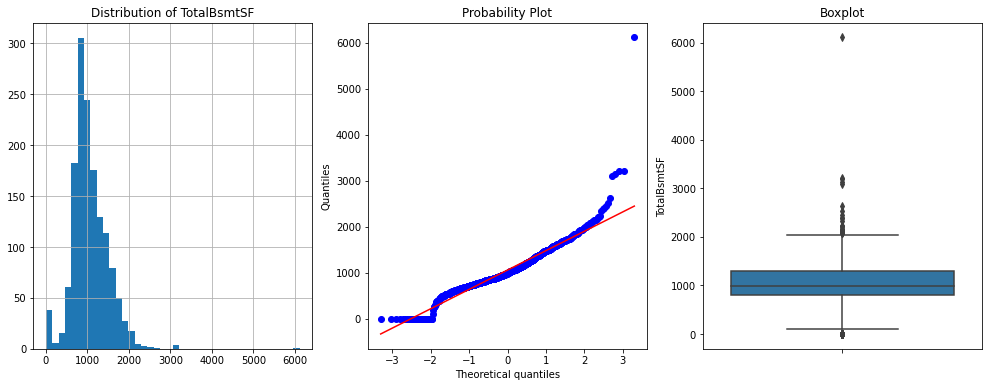

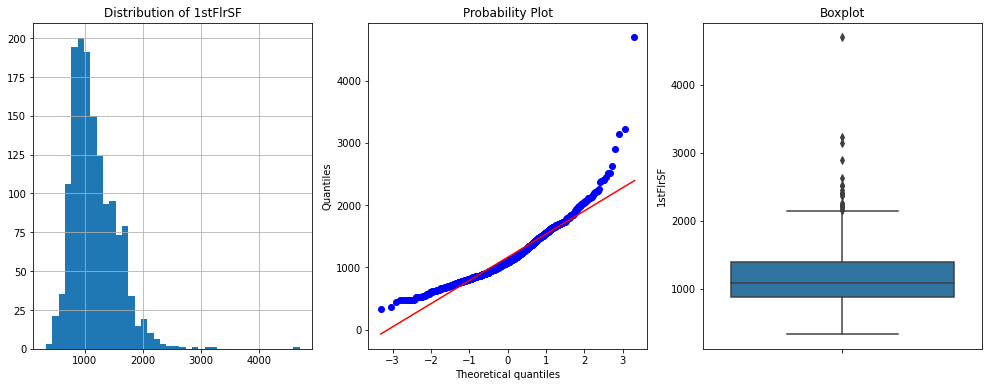

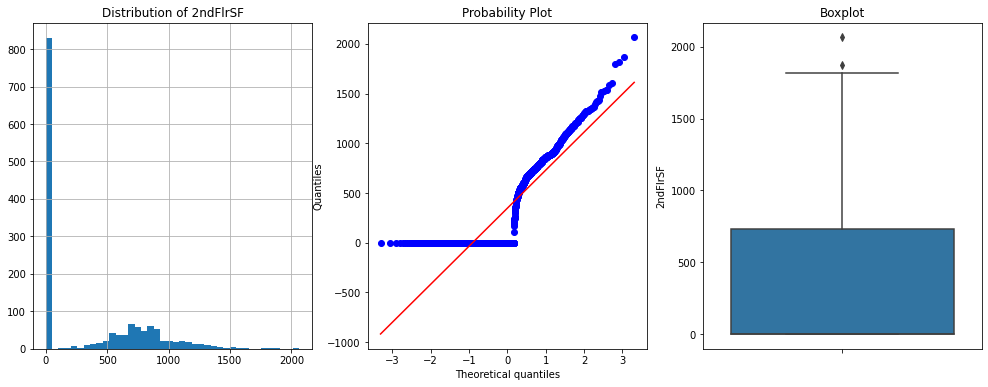

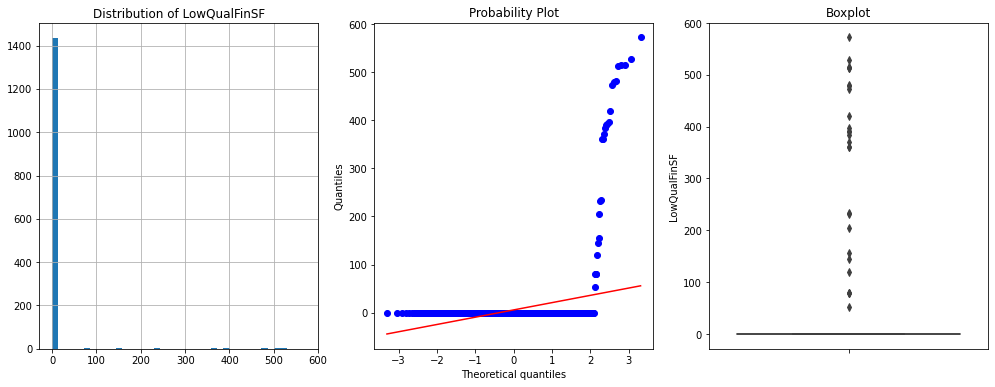

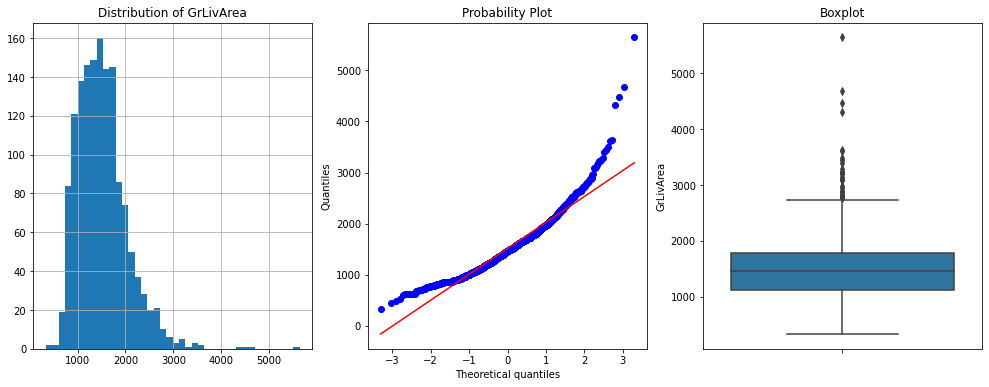

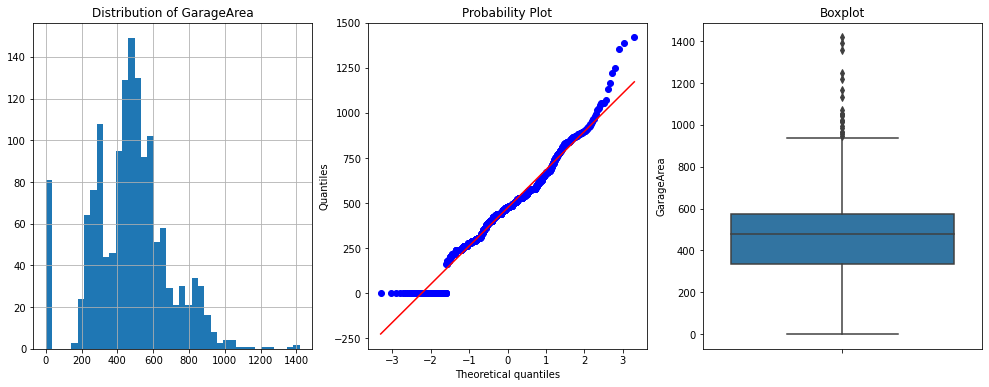

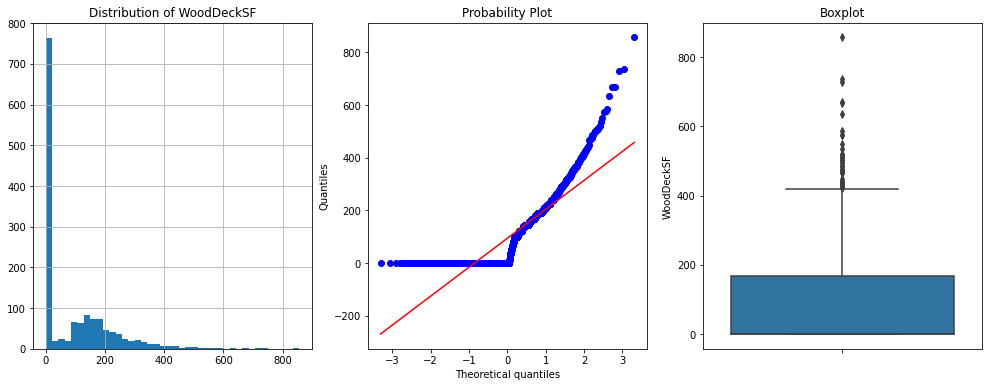

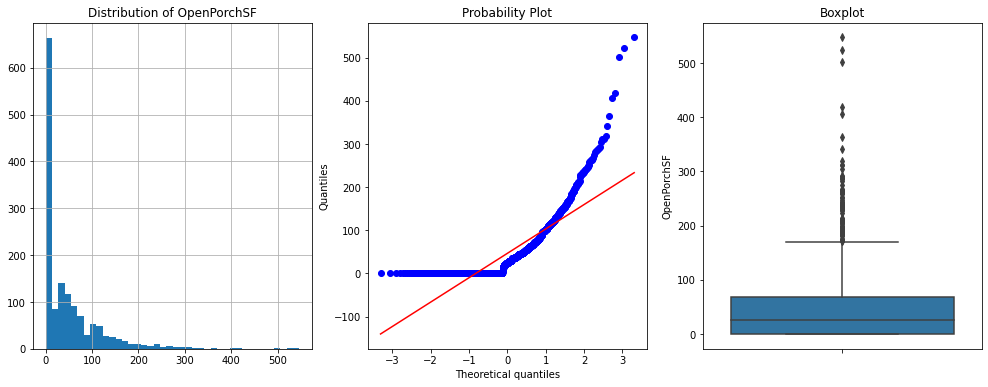

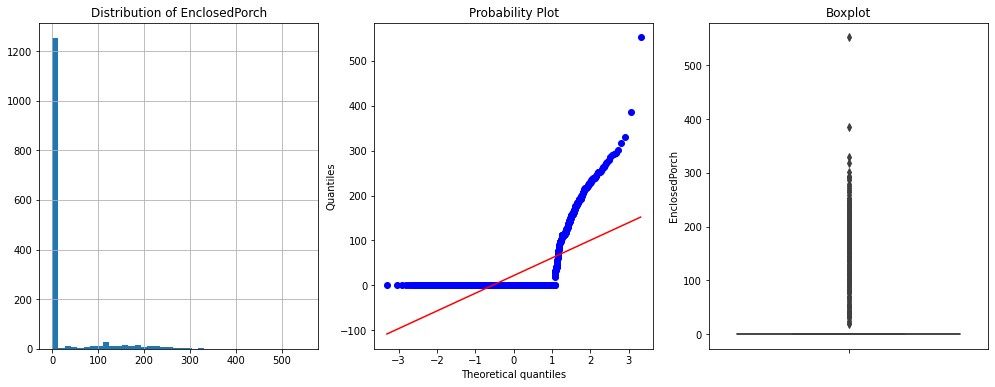

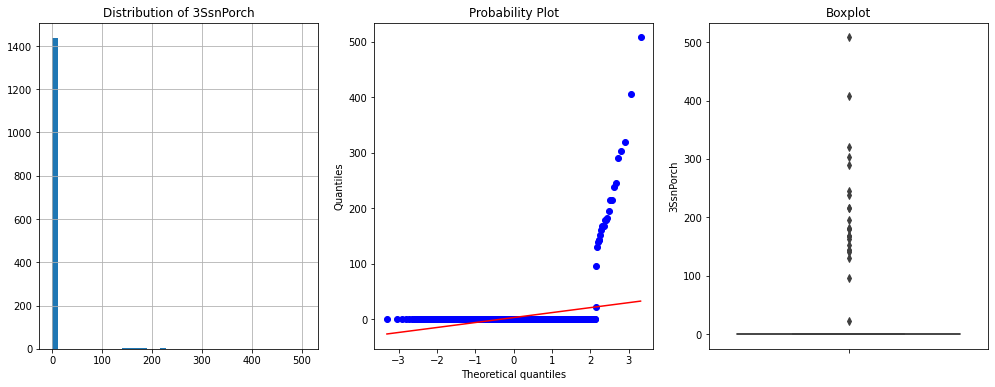

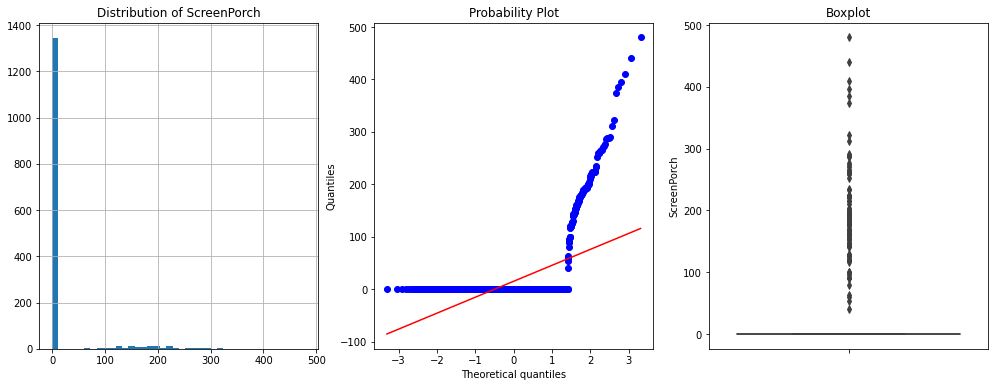

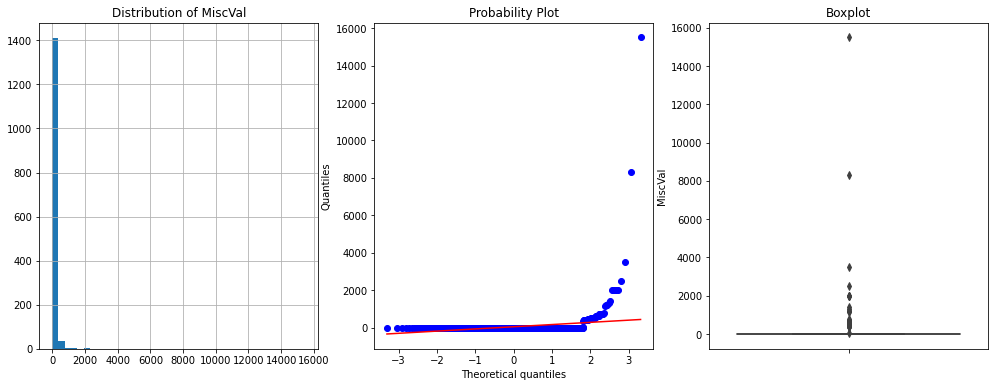

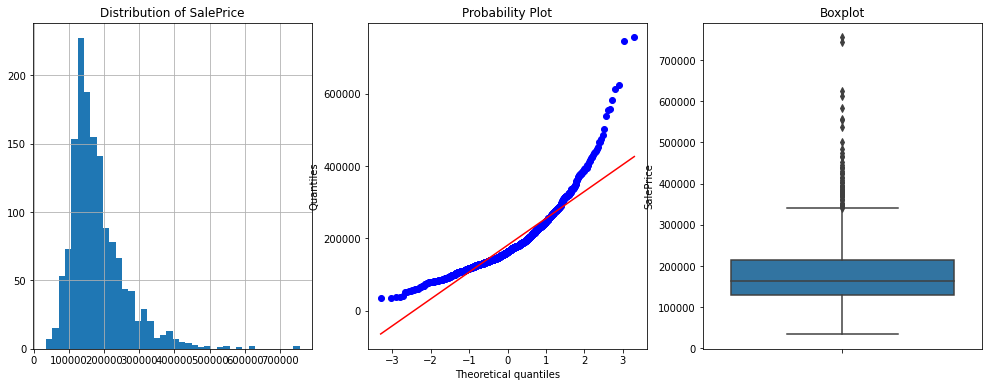

In [34]:
#As such there are 19 continous variables, let's analyse them
def diag(df,var):
    
    fig = plt.figure(figsize = (17, 6))
    plt.subplot(1,3,1)
    df[var].hist(bins = 40)
    plt.title("Distribution of {}".format(var))
    
    plt.subplot(1,3,2)
    sp.probplot(df[var], dist = "norm", plot = plt)
    plt.ylabel("Quantiles")
    
    plt.subplot(1,3,3)
    sns.boxplot(y = df[var])
    plt.title("Boxplot")
    plt.show()
    
for var in cont_data:
    diag(dataset,var)

In [35]:

    
for y in cont_data:
    mean=round(dataset[y].mean(),2)
    var=round(dataset[y].var(),2)
    std=round(dataset[y].std(),2)
    
    q1= round(dataset[y].quantile(.25),2)
    q2=round(dataset[y].quantile(.5),2)
    q3=round(dataset[y].quantile(.75),2)
    skew=round(dataset[y].skew(),2)
    kurt=round(dataset[y].kurt(),2)
    print(f"\n Variable name= {y.upper()},\n Mean value={mean},\n Variance={var},\n Standard Deviation={std},\n Quantile1={q1},\n Quantile2={q2},\n Quantile3={q3},\n Skewness={skew},\n kurtosis={kurt}")
    


 Variable name= LOTFRONTAGE,
 Mean value=70.05,
 Variance=589.75,
 Standard Deviation=24.28,
 Quantile1=59.0,
 Quantile2=69.0,
 Quantile3=80.0,
 Skewness=2.16,
 kurtosis=17.45

 Variable name= LOTAREA,
 Mean value=10516.83,
 Variance=99625649.65,
 Standard Deviation=9981.26,
 Quantile1=7553.5,
 Quantile2=9478.5,
 Quantile3=11601.5,
 Skewness=12.21,
 kurtosis=203.24

 Variable name= MASVNRAREA,
 Mean value=103.69,
 Variance=32784.97,
 Standard Deviation=181.07,
 Quantile1=0.0,
 Quantile2=0.0,
 Quantile3=166.0,
 Skewness=2.67,
 kurtosis=10.08

 Variable name= BSMTFINSF1,
 Mean value=443.64,
 Variance=208025.47,
 Standard Deviation=456.1,
 Quantile1=0.0,
 Quantile2=383.5,
 Quantile3=712.25,
 Skewness=1.69,
 kurtosis=11.12

 Variable name= BSMTFINSF2,
 Mean value=46.55,
 Variance=26023.91,
 Standard Deviation=161.32,
 Quantile1=0.0,
 Quantile2=0.0,
 Quantile3=0.0,
 Skewness=4.26,
 kurtosis=20.11

 Variable name= BSMTUNFSF,
 Mean value=567.24,
 Variance=195246.41,
 Standard Deviation=441.8

In [36]:
#From above we can analyze the continous variable 

From above I can say that most of the continous variables are skewed and they are not normally distributed and there are outliers also 

In [37]:
#Now we will analyze the categorical variables
cat_data= dataset.dtypes[dataset.dtypes=="object"].index
dataset[cat_data].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [38]:
cat_data

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

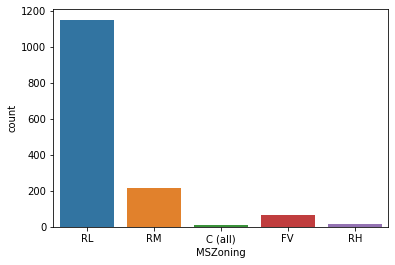

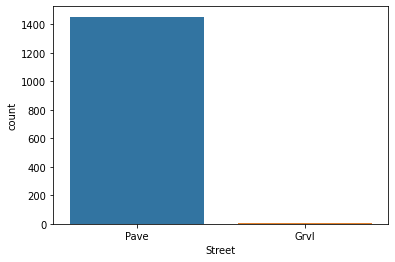

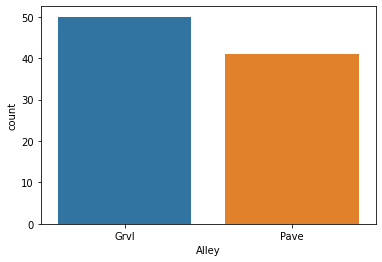

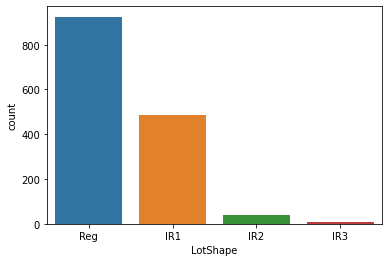

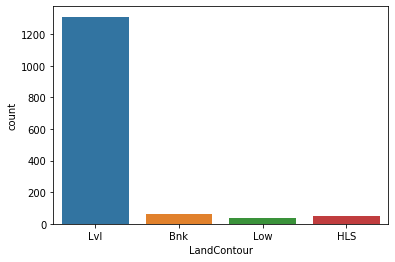

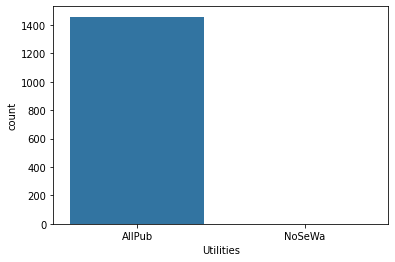

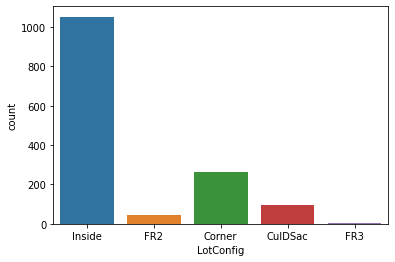

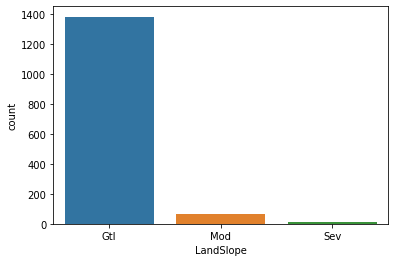

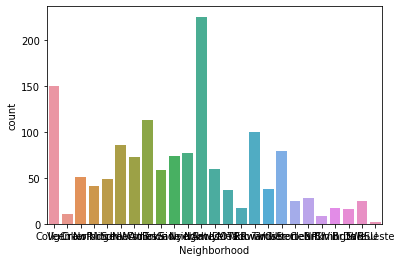

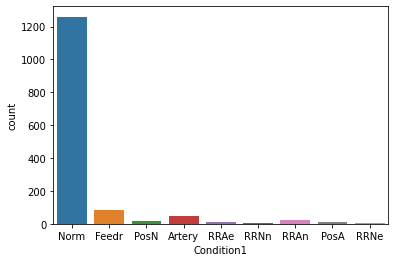

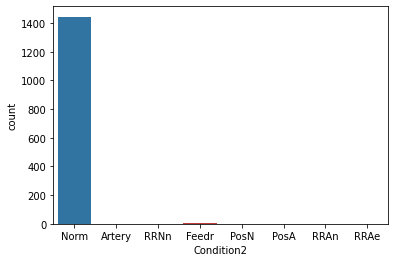

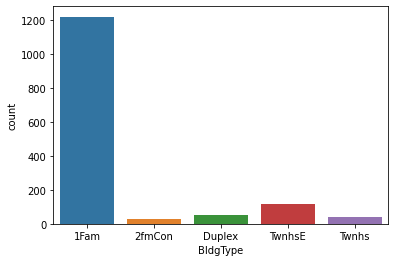

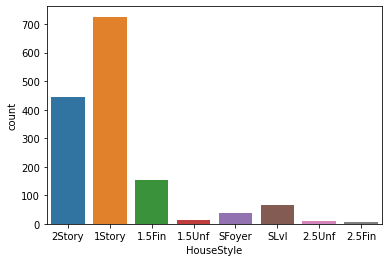

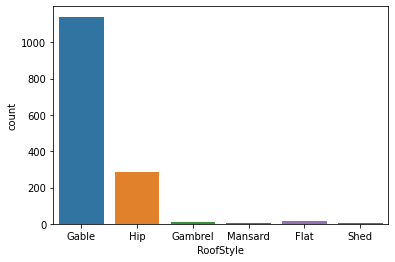

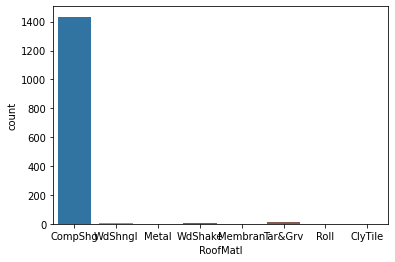

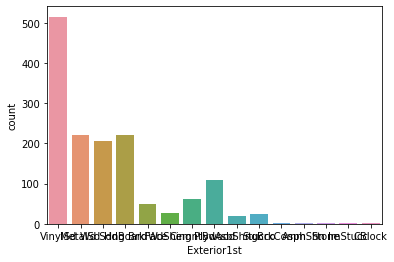

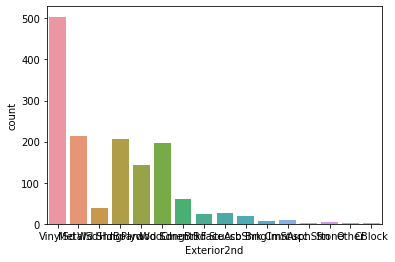

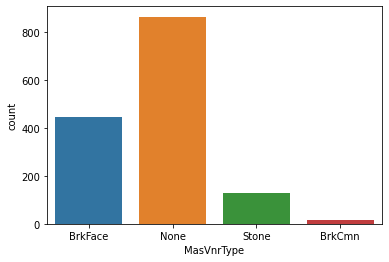

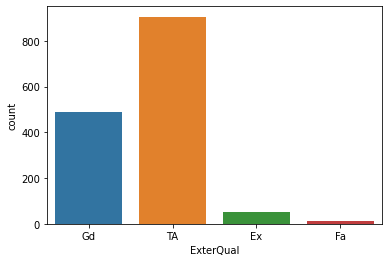

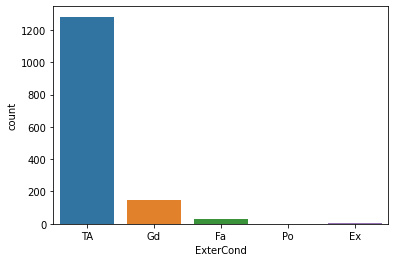

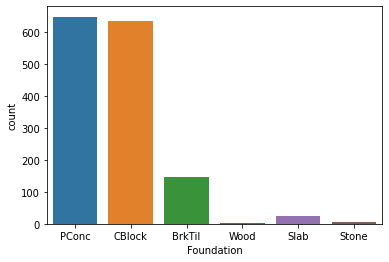

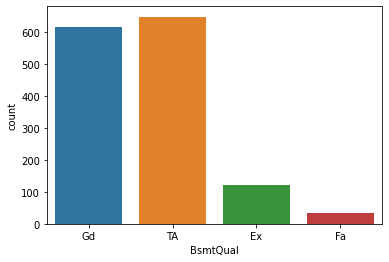

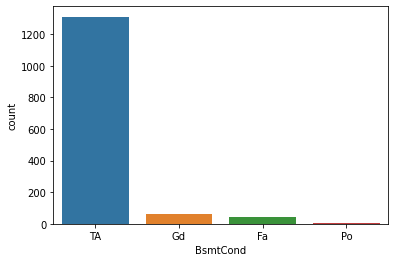

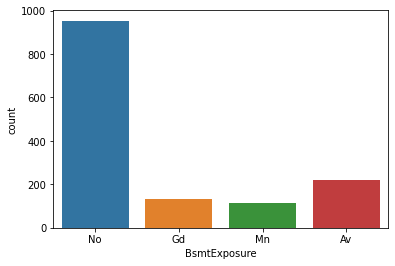

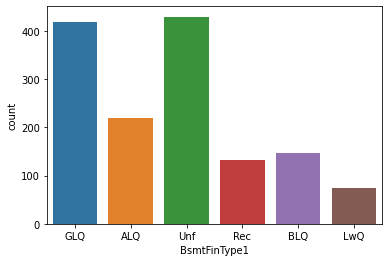

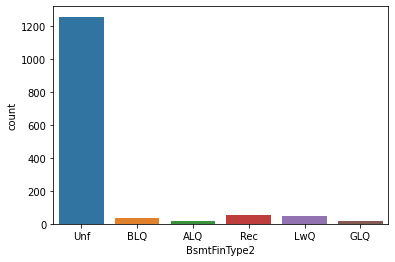

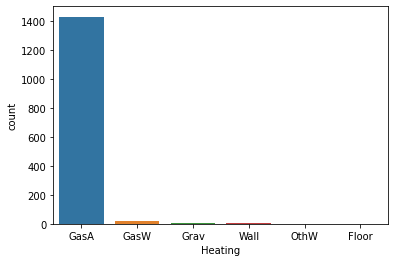

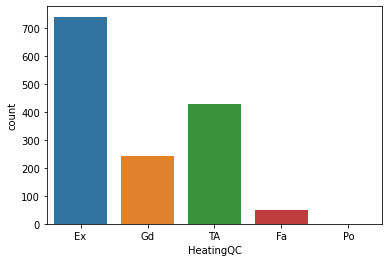

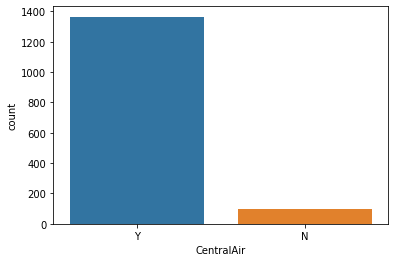

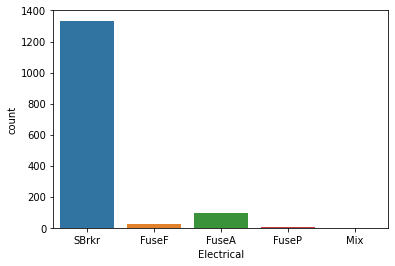

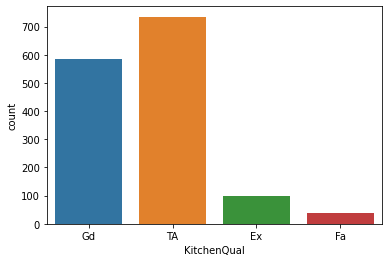

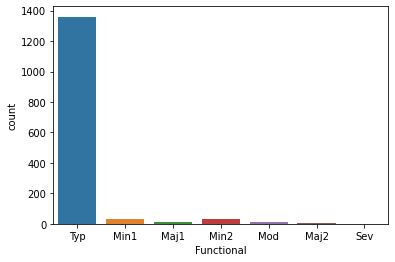

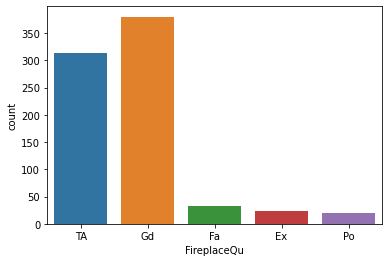

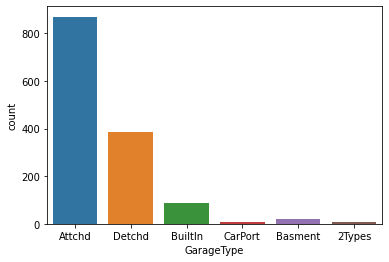

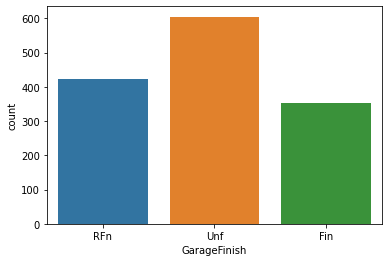

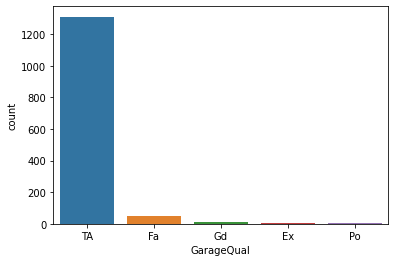

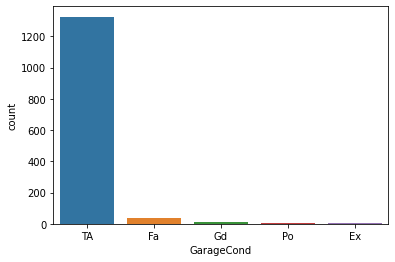

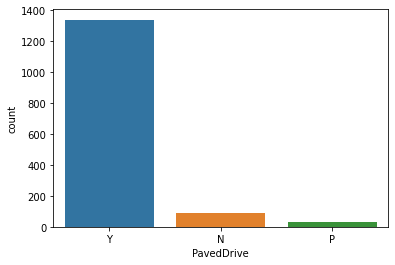

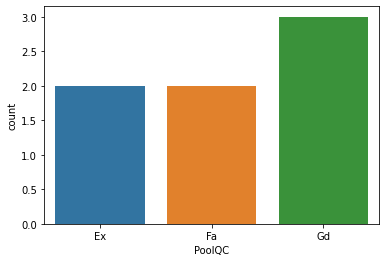

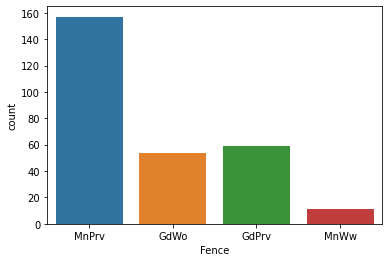

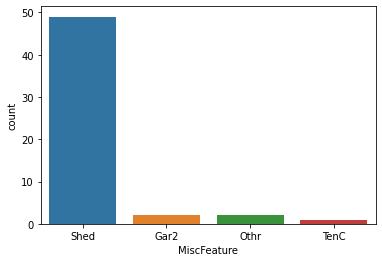

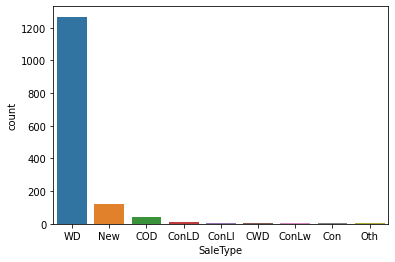

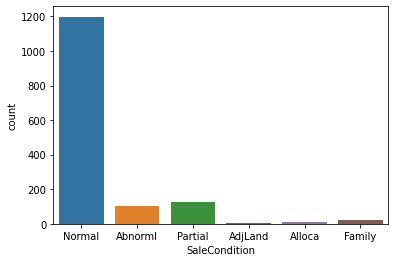

In [39]:
#These are the variables which are categorical, so lets analyse them
for feat in cat_data:
    data= dataset.copy()
    sns.countplot(data[feat], x=feat)
    plt.show()

In [40]:
for y in cat_data:
    unique_count= dataset[y].nunique()
    unique_cat= list(dataset[y].unique())
    f1=pd.DataFrame(dataset[y].value_counts(dropna=False))
    f1.rename(columns={y:"Count"},inplace=True)
    f2=pd.DataFrame(dataset[y].value_counts(normalize=True))
    f2.rename(columns={y:"percentage"},inplace=True)
    f2["percentage"]=round(f2["percentage"]*100,2)  #(f2["percentage"]*100).round(2).astype(str)+"%" (if we want to add percentage
                                                    #then we have to convert it to string then will add %symbol)
    ff=pd.concat([f1,f2],axis=1)
    print(f"\n Variable name= {y.upper()},\n Unique Category={unique_cat},\n unique count={unique_count},\n value count and %\n={ff}")
    


 Variable name= MSZONING,
 Unique Category=['RL', 'RM', 'C (all)', 'FV', 'RH'],
 unique count=5,
 value count and %
=         Count  percentage
RL        1151       78.84
RM         218       14.93
FV          65        4.45
RH          16        1.10
C (all)     10        0.68

 Variable name= STREET,
 Unique Category=['Pave', 'Grvl'],
 unique count=2,
 value count and %
=      Count  percentage
Pave   1454       99.59
Grvl      6        0.41

 Variable name= ALLEY,
 Unique Category=[nan, 'Grvl', 'Pave'],
 unique count=2,
 value count and %
=      Count  percentage
NaN    1369         NaN
Grvl     50       54.95
Pave     41       45.05

 Variable name= LOTSHAPE,
 Unique Category=['Reg', 'IR1', 'IR2', 'IR3'],
 unique count=4,
 value count and %
=     Count  percentage
Reg    925       63.36
IR1    484       33.15
IR2     41        2.81
IR3     10        0.68

 Variable name= LANDCONTOUR,
 Unique Category=['Lvl', 'Bnk', 'Low', 'HLS'],
 unique count=4,
 value count and %
=     Count  pe

In [41]:
#From above we can get to know the unique values along with it value_count

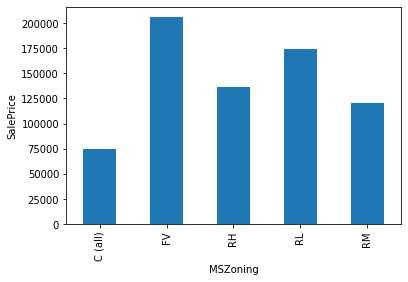

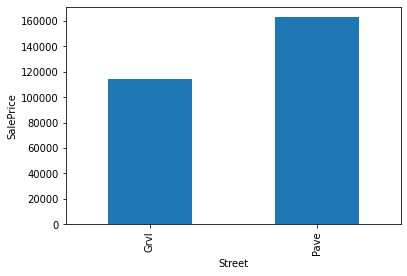

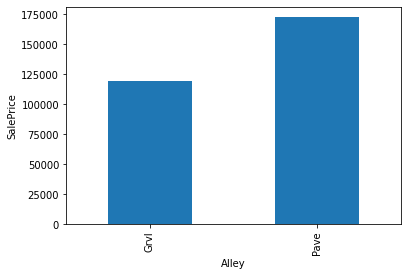

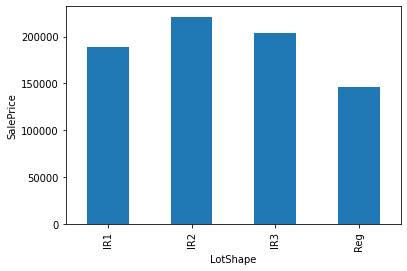

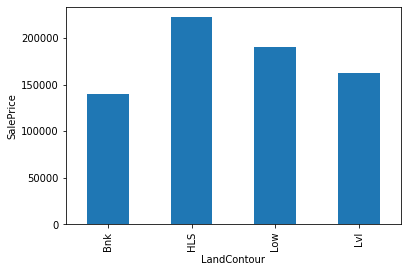

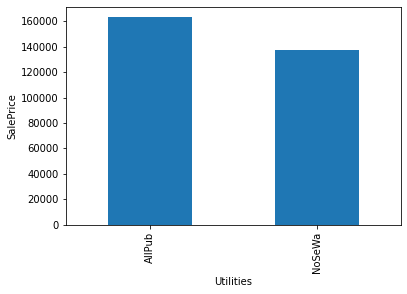

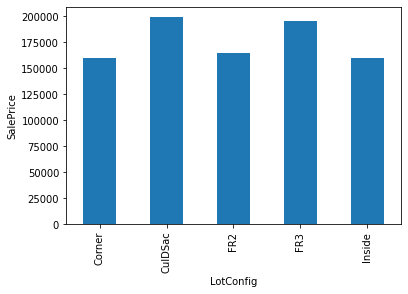

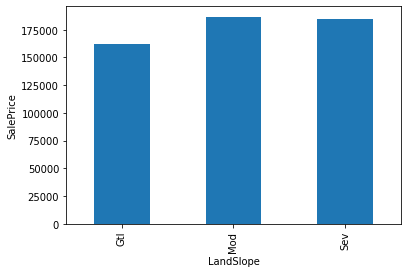

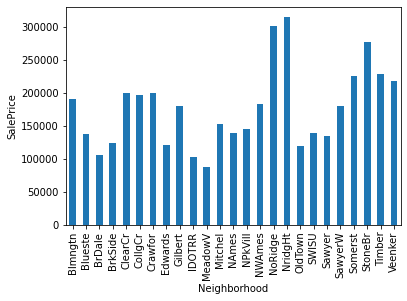

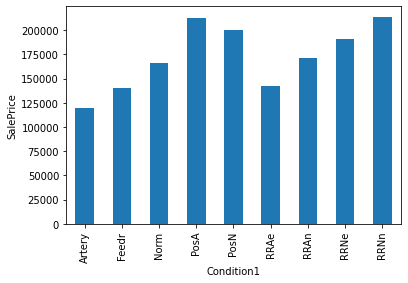

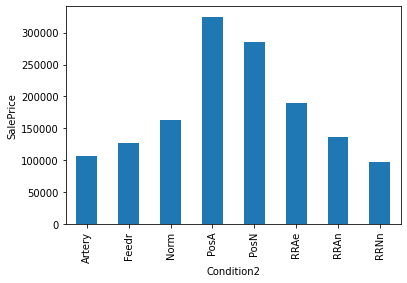

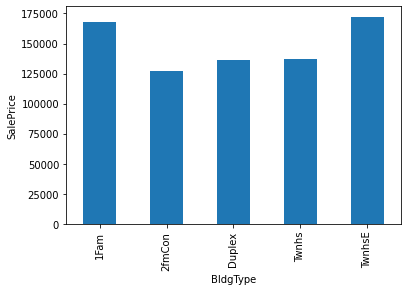

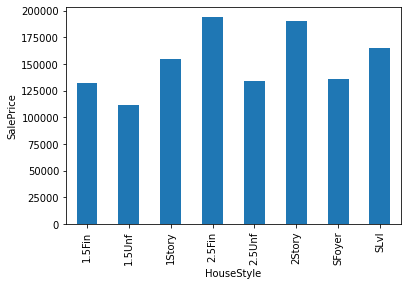

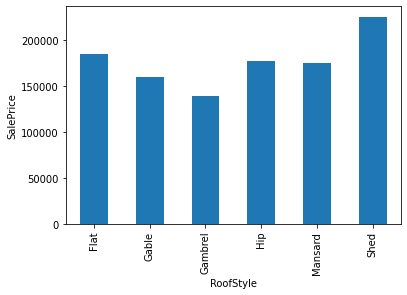

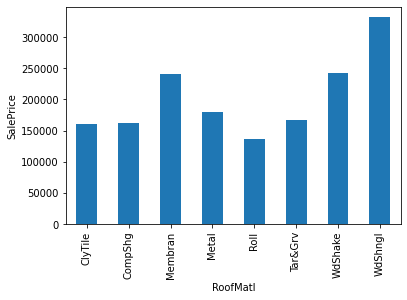

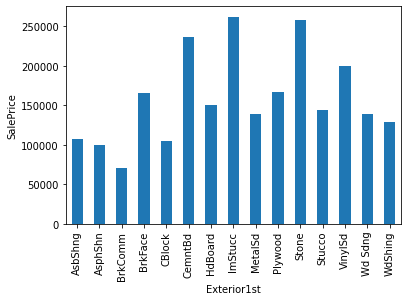

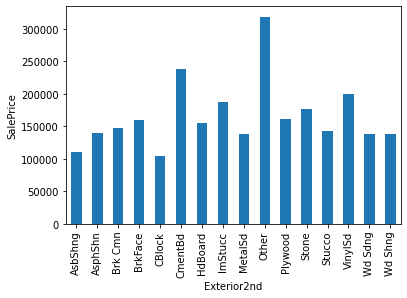

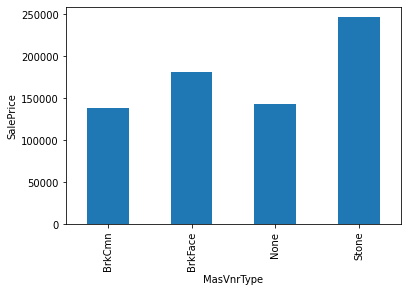

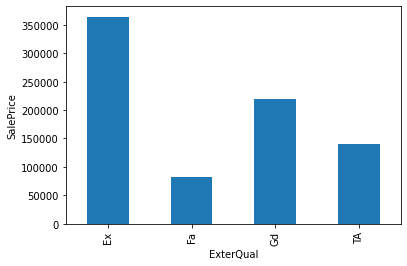

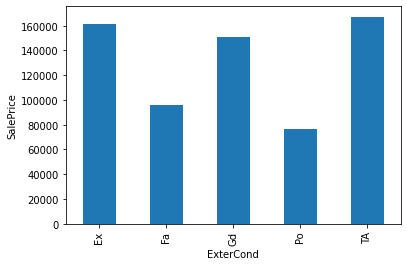

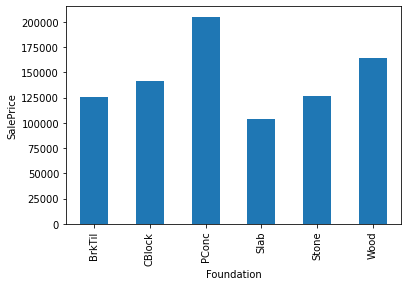

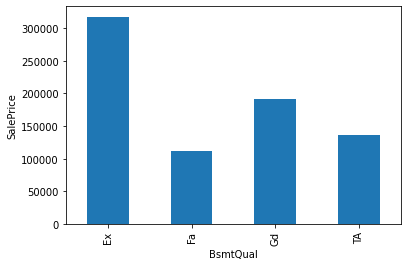

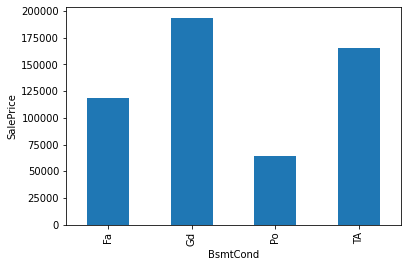

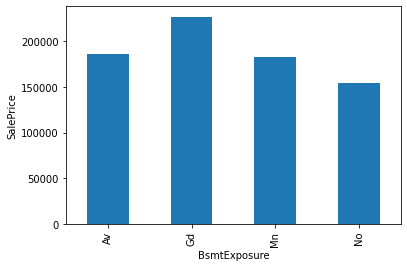

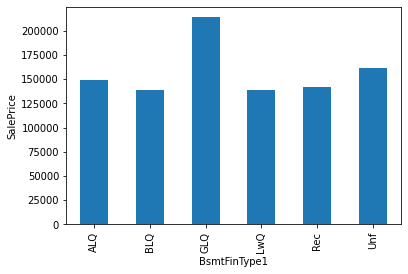

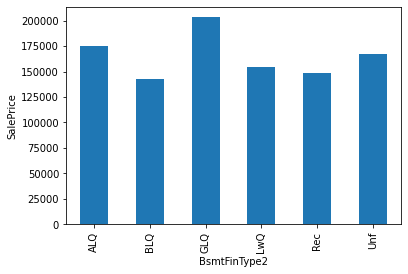

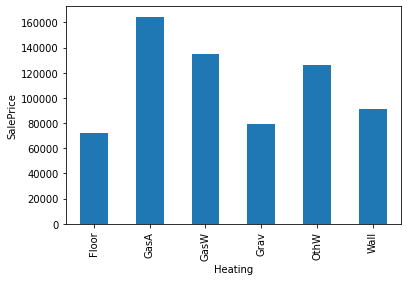

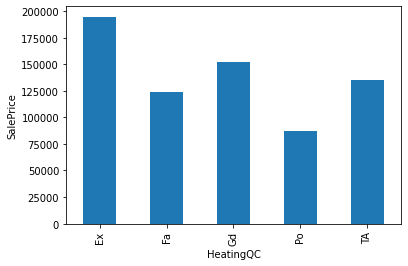

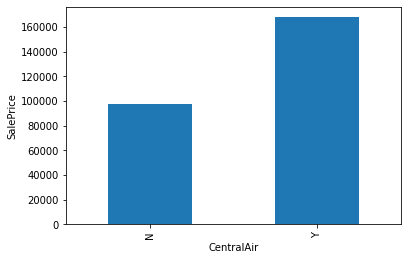

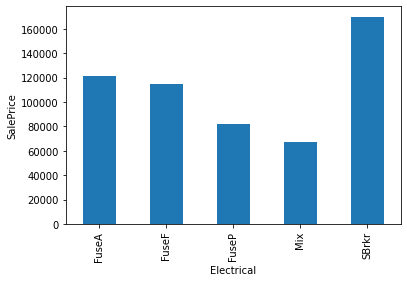

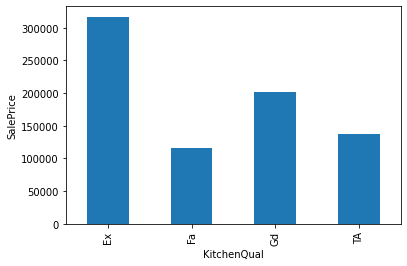

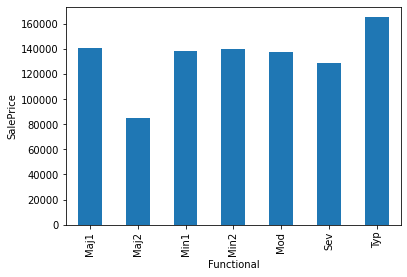

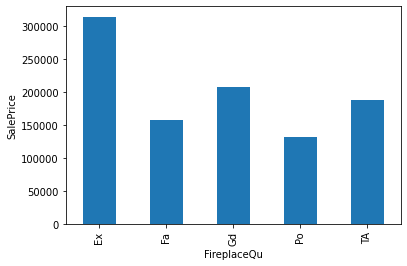

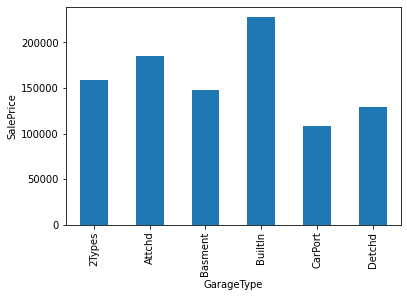

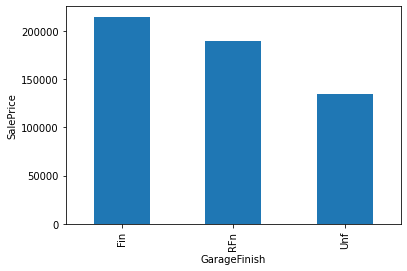

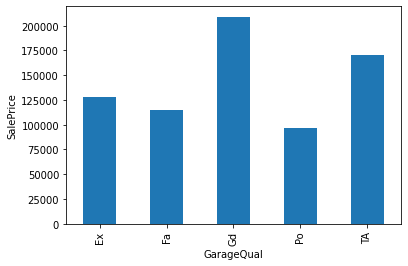

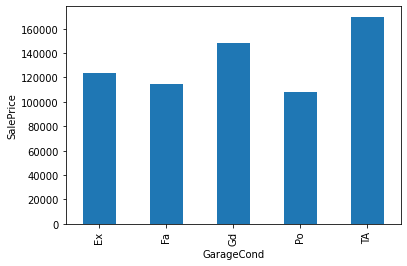

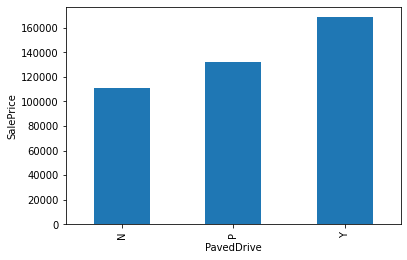

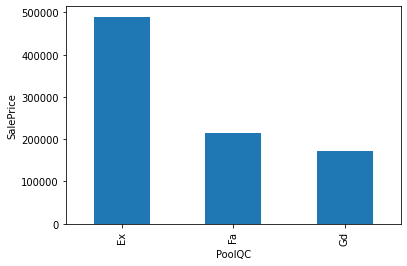

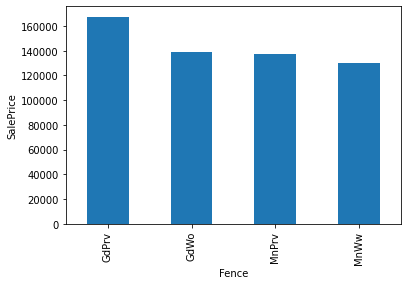

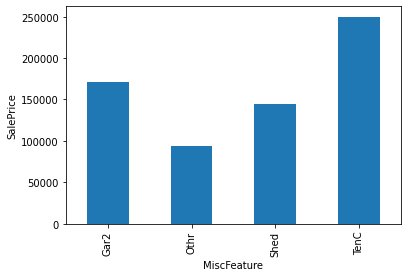

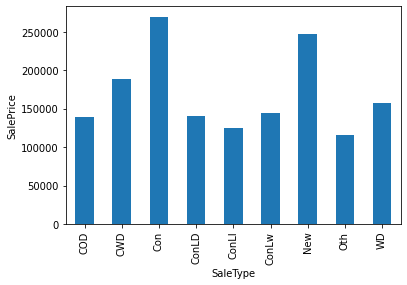

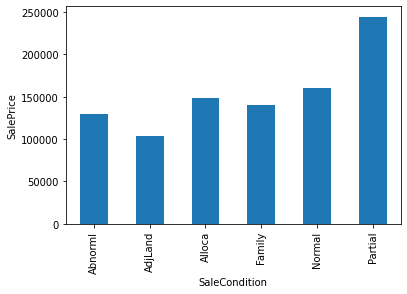

In [42]:
#Now we will analyse the cat_data with the Salesprice
for feat in cat_data:
    data.groupby(feat)["SalePrice"].median().plot(kind="bar")
    plt.xlabel(feat)
    plt.ylabel("SalePrice")
    plt.show()

So from above data we will get to know that at which unique feature the saleprice is high.

In [43]:
#Now analyzing the distribution of the variable with the sale Price using hypothesis testing

In [44]:
def price_distribution(df, saleprice, ob_variable):
    plt.figure(figsize=[15,9])
    plot_type="Density"
    sns.kdeplot(data=df, x= saleprice, hue=ob_variable, fill=True)
    plt.title(f"{plot_type.title()} plot of {saleprice} by {ob_variable}")
    plt.xlabel(saleprice)
    plt.ylabel('Count' if plot_type=="hist" else "Density")
    plt.show()

stat= 270.0701971937021 
p= 3.0807239995999556e-57
Probably the different distributions


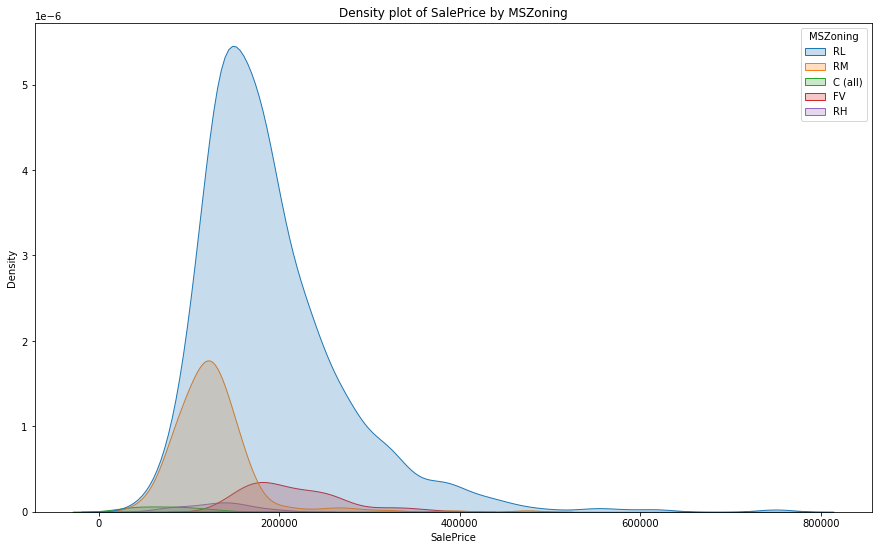

None


In [45]:
#"SalePrice" is to "Mszonning" distribution 
a=dataset[dataset["MSZoning"]=="RL"]
b=dataset[dataset["MSZoning"]=="RM"]
c=dataset[dataset["MSZoning"]=="C (all)"]
d=dataset[dataset["MSZoning"]=="FV"]
e=dataset[dataset["MSZoning"]=="RH"]
stat,p =kruskal(a["SalePrice"],b["SalePrice"], c["SalePrice"], d["SalePrice"],e["SalePrice"])
print(f"stat= {stat} \np= {p}")
if p>0.05:
    print("Probably the same distribution")
else:
    print("Probably the different distributions")
print(price_distribution(dataset, "SalePrice", "MSZoning"))

stat= 185.42942624253948 
p= 1.3885066980303377e-36
Probably the different distributions


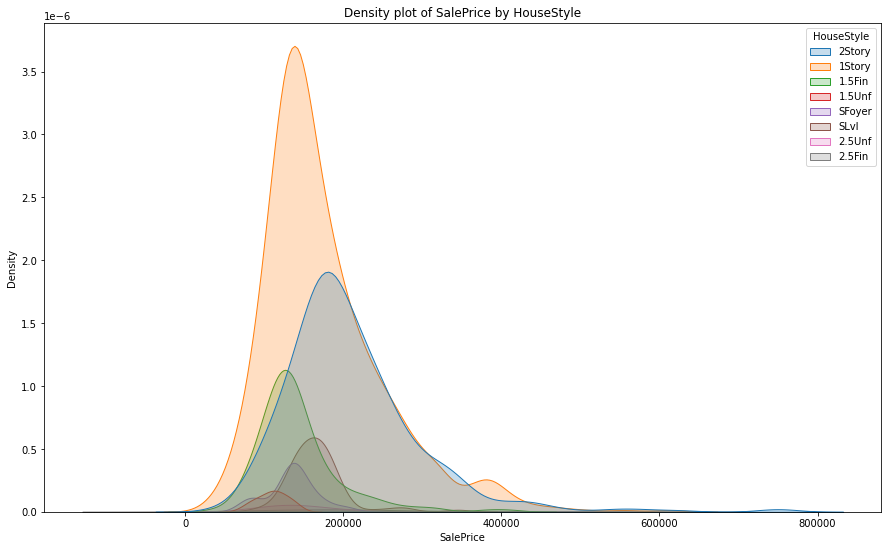

None


In [46]:
#"SalePrice" is to "HouseStyle" distribution
a=dataset[dataset["HouseStyle"]=="2Story"]
b=dataset[dataset["HouseStyle"]=="1Story"]
c=dataset[dataset["HouseStyle"]=="1.5Fin"]
d=dataset[dataset["HouseStyle"]=="1.5Unf"]
e=dataset[dataset["HouseStyle"]=="SFoyer"]
f=dataset[dataset["HouseStyle"]=="SLvl"]
g=dataset[dataset["HouseStyle"]=="2.5Unf"]
h=dataset[dataset["HouseStyle"]=="2.5Fin"]
stat,p =kruskal(a["SalePrice"],b["SalePrice"], c["SalePrice"], d["SalePrice"],e["SalePrice"],f["SalePrice"],g["SalePrice"],h["SalePrice"])
print(f"stat= {stat} \np= {p}")
if p>0.05:
    print("Probably the same distribution")
else:
    print("Probably the different distributions")
print(price_distribution(dataset, "SalePrice", "HouseStyle"))

stat= 39.877540702625915 
p= 1.5807327219164252e-07
Probably the different distributions


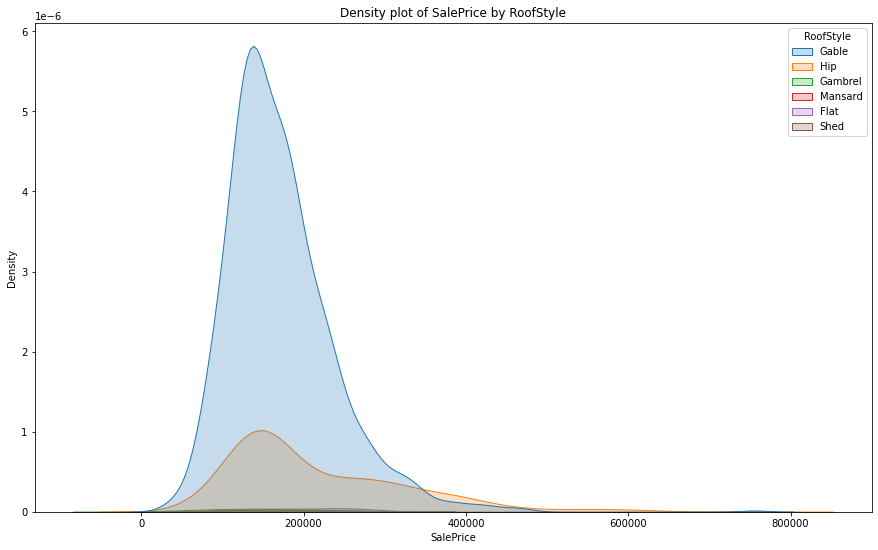

None


In [47]:
#"SalePrice" is to "Roofstyle" distribution 
a=dataset[dataset["RoofStyle"]=="Gable"]
b=dataset[dataset["RoofStyle"]=="Hip"]
c=dataset[dataset["RoofStyle"]=="Gambrel"]
d=dataset[dataset["RoofStyle"]=="Mansard"]
e=dataset[dataset["RoofStyle"]=="Flat"]
f=dataset[dataset["RoofStyle"]=="Shed"]
stat,p =kruskal(a["SalePrice"],b["SalePrice"], c["SalePrice"], d["SalePrice"],e["SalePrice"],f["SalePrice"])
print(f"stat= {stat} \np= {p}")
if p>0.05:
    print("Probably the same distribution")
else:
    print("Probably the different distributions")
print(price_distribution(dataset, "SalePrice", "RoofStyle"))

stat= 661.4815872916723 
p= 4.720112898518107e-143
Probably the different distributions


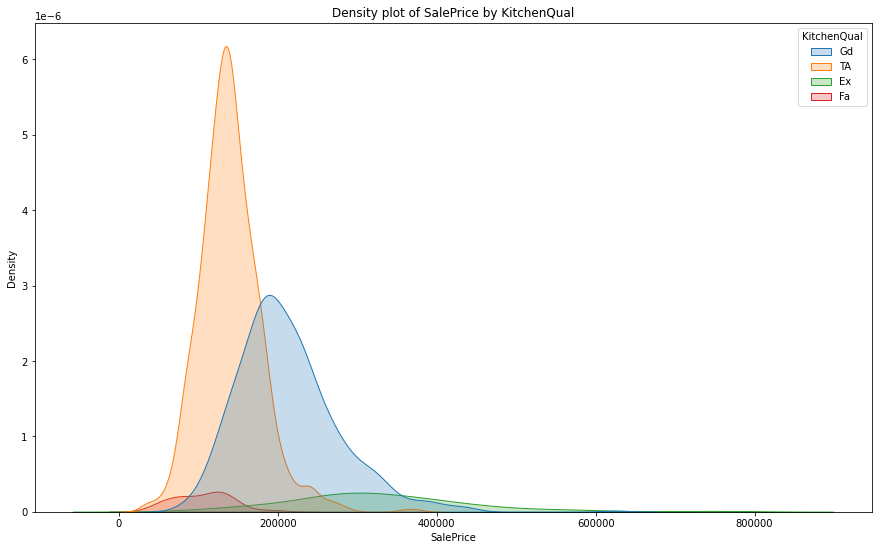

None


In [48]:
#"SalePrice" is to "KitchenStyle" distribution 
a=dataset[dataset["KitchenQual"]=="Gd"]
b=dataset[dataset["KitchenQual"]=="TA"]
c=dataset[dataset["KitchenQual"]=="Ex"]
d=dataset[dataset["KitchenQual"]=="Fa"]
stat,p =kruskal(a["SalePrice"],b["SalePrice"], c["SalePrice"], d["SalePrice"])
print(f"stat= {stat} \np= {p}")
if p>0.05:
    print("Probably the same distribution")
else:
    print("Probably the different distributions")
print(price_distribution(dataset, "SalePrice", "KitchenQual"))

stat= 33.26668604928379 
p= 3.3312797209470924e-06
Probably the different distributions


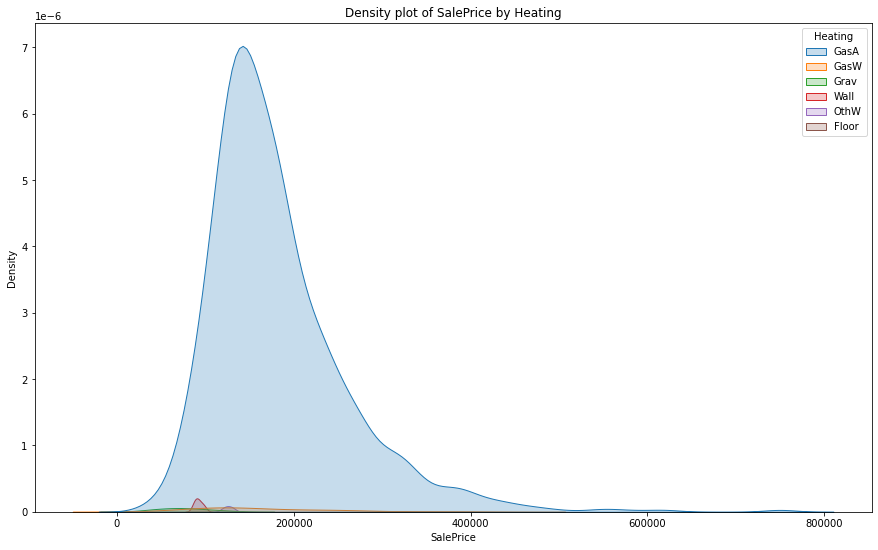

None


In [49]:
#"SalePrice" is to "Heating" distribution 
a=dataset[dataset["Heating"]=="GasA"]
b=dataset[dataset["Heating"]=="GasW"]
c=dataset[dataset["Heating"]=="Grav"]
d=dataset[dataset["Heating"]=="Wall"]
e=dataset[dataset["Heating"]=="OthW"]
f=dataset[dataset["Heating"]=="Floor"]
stat,p =kruskal(a["SalePrice"],b["SalePrice"], c["SalePrice"], d["SalePrice"],e["SalePrice"],f["SalePrice"])
print(f"stat= {stat} \np= {p}")
if p>0.05:
    print("Probably the same distribution")
else:
    print("Probably the different distributions")
print(price_distribution(dataset, "SalePrice", "Heating"))

stat= 168.3225408748753 
p= 1.663313168753084e-34
Probably the different distributions


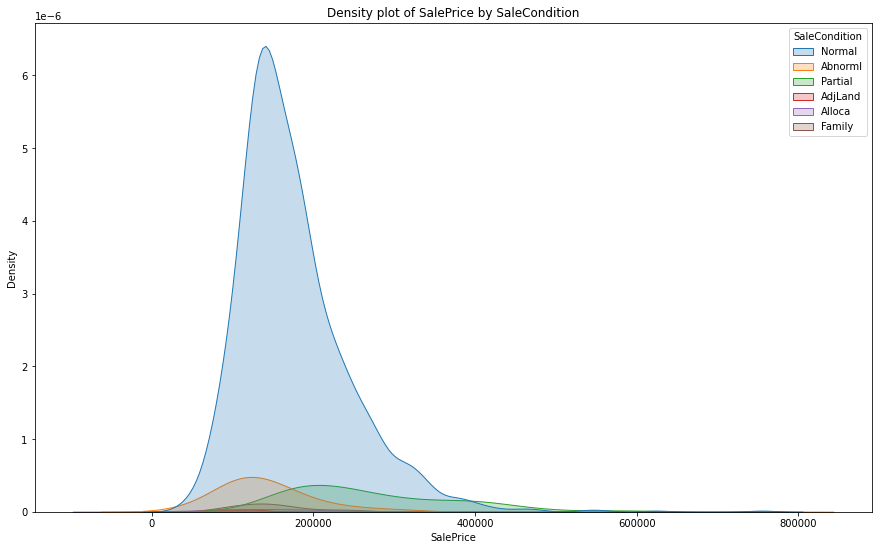

None


In [50]:
#"SalePrice" is to "SaleCondition" distribution 
a=dataset[dataset["SaleCondition"]=="Normal"]
b=dataset[dataset["SaleCondition"]=="Abnorml"]
c=dataset[dataset["SaleCondition"]=="Partial"]
d=dataset[dataset["SaleCondition"]=="AdjLand"]
e=dataset[dataset["SaleCondition"]=="Alloca"]
f=dataset[dataset["SaleCondition"]=="Family"]
stat,p =kruskal(a["SalePrice"],b["SalePrice"], c["SalePrice"], d["SalePrice"],e["SalePrice"],f["SalePrice"])
print(f"stat= {stat} \np= {p}")
if p>0.05:
    print("Probably the same distribution")
else:
    print("Probably the different distributions")
print(price_distribution(dataset, "SalePrice", "SaleCondition"))

stat= 421.1545081643868 
p= 8.166414793120863e-89
Probably the different distributions


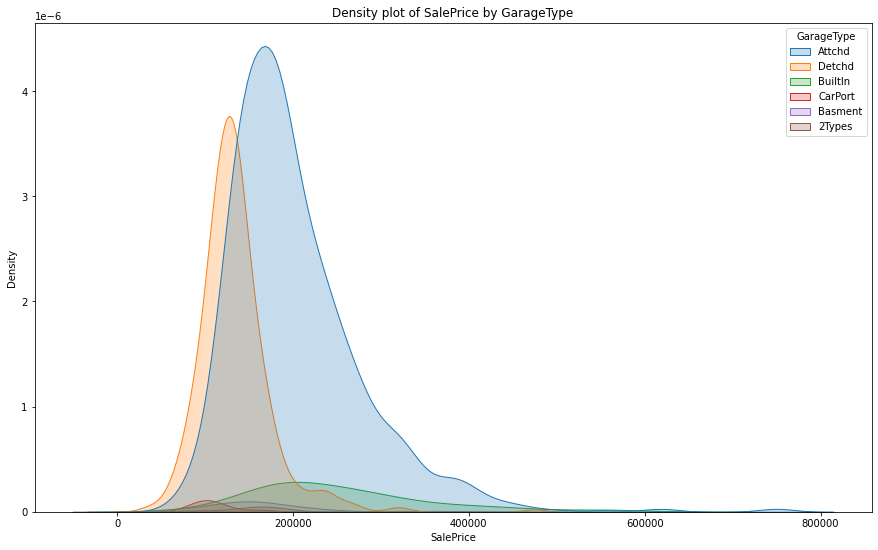

None


In [51]:
#"SalePrice" is to "GarageType" distribution 'Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'
a=dataset[dataset["GarageType"]=="Attchd"]
b=dataset[dataset["GarageType"]=="Detchd"]
c=dataset[dataset["GarageType"]=="BuiltIn"]
d=dataset[dataset["GarageType"]=="CarPort"]
e=dataset[dataset["GarageType"]=="Basment"]
f=dataset[dataset["GarageType"]=="2Types"]
stat,p =kruskal(a["SalePrice"],b["SalePrice"], c["SalePrice"], d["SalePrice"],e["SalePrice"],f["SalePrice"])
print(f"stat= {stat} \np= {p}")
if p>0.05:
    print("Probably the same distribution")
else:
    print("Probably the different distributions")
print(price_distribution(dataset, "SalePrice", "GarageType"))

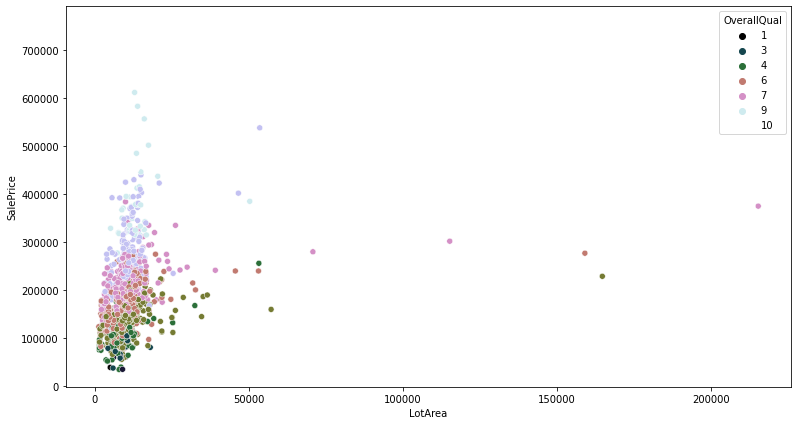

In [52]:
#we will analyse more then two variables at a time 
plt.figure(figsize=(13,7))
sns.scatterplot(y="SalePrice", x="LotArea",hue="OverallQual", data= dataset,palette="cubehelix")
plt.show()

From above I can say that the house whose over all quality is 9 has a high saleprice and most of the distribution is btw 0-5000

In [53]:
dataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

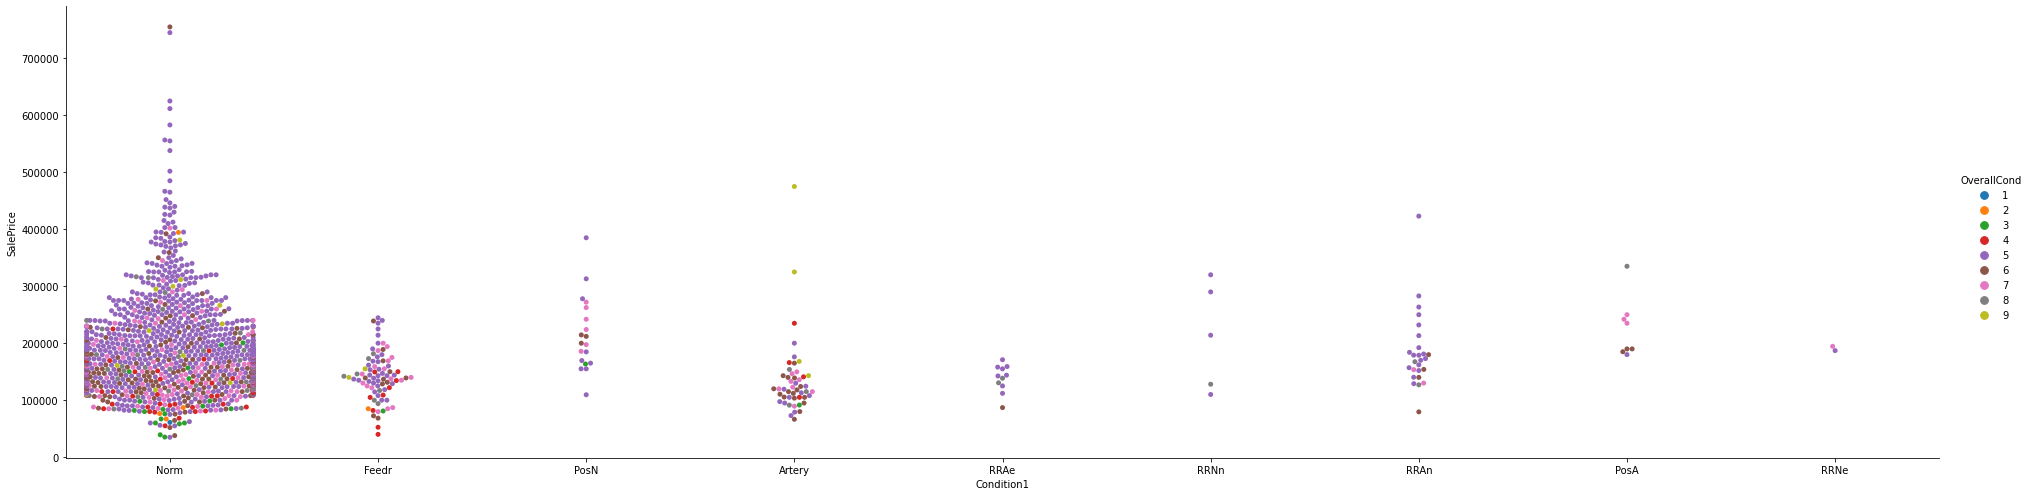

In [54]:
sns.catplot(x="Condition1",y="SalePrice", kind="swarm", hue="OverallCond",height = 7,aspect = 3.9, data= dataset)
plt.show()

In [55]:
#This clearly shows that most of the overall condition is at 5 and the prices are high at norm condition1.

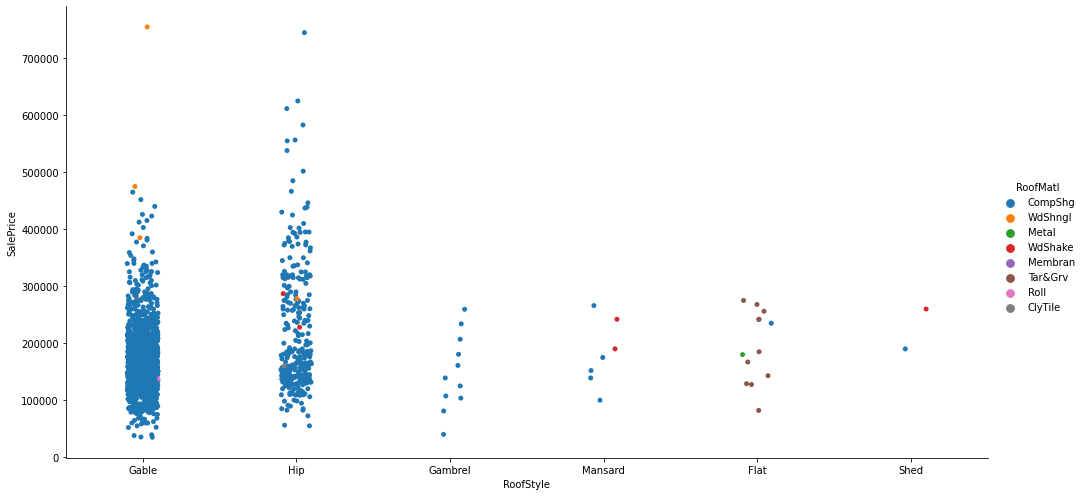

In [56]:
sns.catplot(x="RoofStyle", y="SalePrice", kind= "strip", hue="RoofMatl", height = 7,aspect = 2, data= dataset)
plt.show()

from above I can say that in roofstyle mostly the material which has been used is CompShg and for the roofstyle Gable and Hip it has high price as compare to another roofstyle.

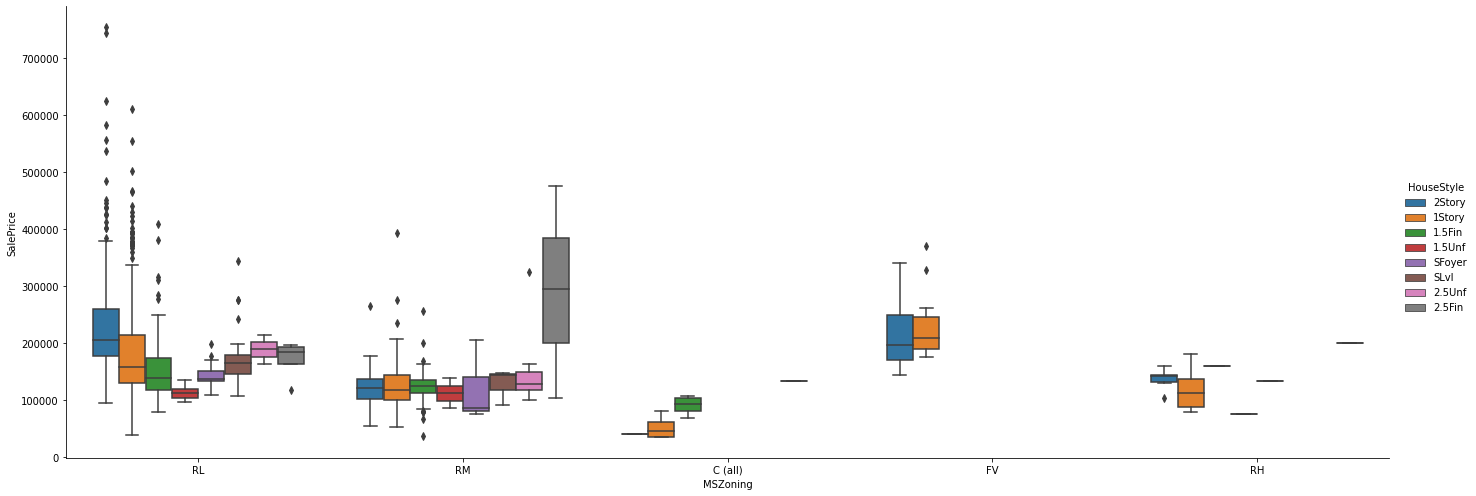

In [57]:
sns.catplot(x="MSZoning",y="SalePrice", kind= "box", hue="HouseStyle", height = 7, aspect = 2.8, data=dataset)
plt.show()

from above I can say is that in Residential living 2 story has high prices then another housestyles
then in Residential Medium density 2.5 Fin has high prices
and in C(all) 2.5 unf has high prices
and in floating village 1 story has high prices
and in Residential high density 2.5 Fin has high prices

which signifies that each zone has different prices according to housestyle or we can say that it also depends on another factors

In [58]:
#Let's compare the overall quality with the salesprice along with the housestyle
px.histogram(dataset, x="OverallQual",y = "SalePrice",
                   marginal = None,
                   color = "HouseStyle",
                   text_auto = True,
                   hover_data  = dataset.columns,
                   height = 500, width = 800)

In [59]:
#From above it shows that the prices are high for the over all quality of 7 and according to the 2 story housestyle.

In [60]:
px.histogram(dataset, x = "BedroomAbvGr",
                   y = "SalePrice",
                   marginal = None,
                   color = "HouseStyle", text_auto = True,
                   hover_data  = dataset.columns,
                   height = 500, width = 800)

In [61]:
#From above we can state that the prices are high for the BedroomAbvGr=3 and for that 1 story has high prices along with this.

In [62]:
px.histogram(dataset, x = "RoofMatl",
                   y = "SalePrice",
                   marginal = None,
                   color = "Heating",
                   text_auto = True,
                   hover_data  = dataset.columns,
                   height = 500, width = 800)

In [63]:
# From above I  can state that the roof material= CompShg which has been used has high prices and according to that
# GasA has high prices

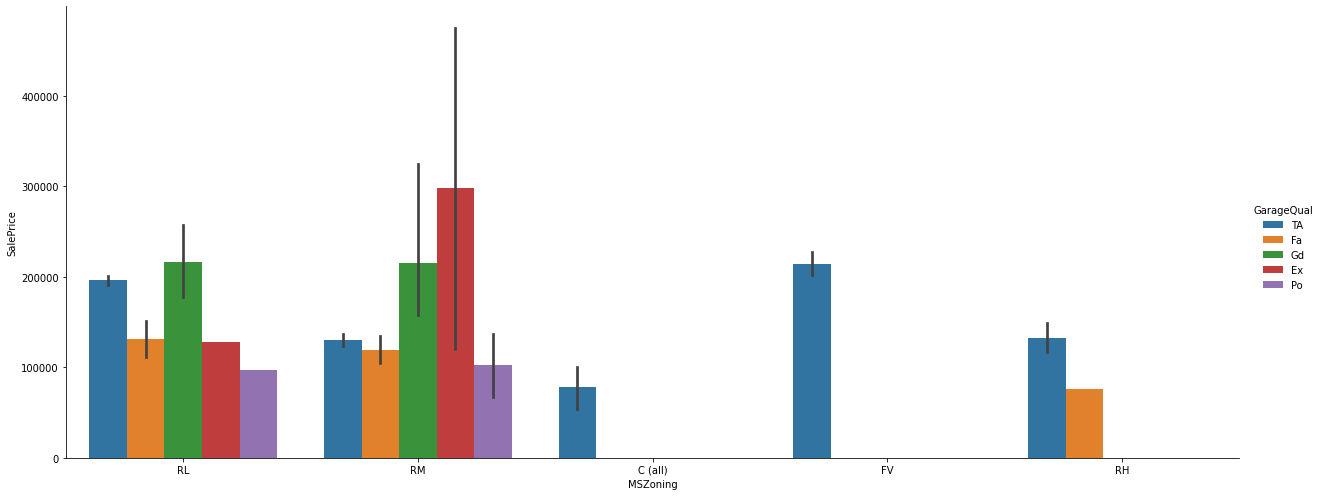

In [64]:
sns.catplot(x= "MSZoning", y="SalePrice", kind="bar", hue="GarageQual", height=7, aspect=2.5, data= dataset)

In [65]:
#From above we can state that based on zoning, prices are different according to the Garage Quality 
# - In RL zoning the garage quality which is good has high prices
# - In RM zoning the garage quality which is excellent has high prices
# - In FV zoning the garage quality which is Average has high prices
# - In RH zoning the garage quality which is Average has high prices.

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

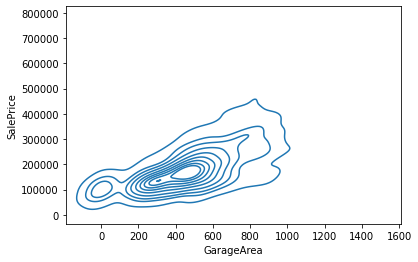

In [66]:
sns.kdeplot(x="GarageArea", y="SalePrice", data=dataset)

In [67]:
# From above we can say that garage area btw 800-950 have the high sale prices
# And most of the garage area falls under 200-700

As we have done with some of the variables analysation now we will do the feature engineering 

##### Feature Engineering

###### Missing values

In [68]:
#Now lets analyse first that how many missing values are there.

In [69]:
no_miss=dataset.isnull().sum().sort_values(ascending=False)
perc_miss= ((dataset.isnull().sum()/dataset.isnull().count())*100).sort_values(ascending=False)

In [70]:
#now lets combine the no_miss and perc_miss data
miss_data=pd.concat([no_miss,perc_miss],keys=["Total number of missing data","Total percent"],axis=1)
miss_data.head(19)

Total number of missing data  Total percent
PoolQC                                1453      99.520548
MiscFeature                           1406      96.301370
Alley                                 1369      93.767123
Fence                                 1179      80.753425
FireplaceQu                            690      47.260274
LotFrontage                            259      17.739726
GarageYrBlt                             81       5.547945
GarageCond                              81       5.547945
GarageType                              81       5.547945
GarageFinish                            81       5.547945
GarageQual                              81       5.547945
BsmtExposure                            38       2.602740
BsmtFinType2                            38       2.602740
BsmtCond                                37       2.534247
BsmtQual                                37       2.534247
BsmtFinType1                            37       2.534247
MasVnrArea                               8       0.547945
MasVnrType                               8       0.547945
Electrical                               1       0.068493

As such these are the variables which contains missing value and as I can see that top 6 variables contains lot of missing data hence we can drop them 
But I am not dropping it as I don't know that whether these variables are important or not hence I am not dropping it.

In [71]:
# Now we will treat the missing values 
# Will going to fill Missing value in the categorical data and for the numerical data will going to fill the median for it

In [72]:
#So first lets seperate the numeric and the categorical variables then we will treat the missing values

In [73]:
col=dataset.dtypes[dataset.dtypes=="object"].index
num=dataset.dtypes[dataset.dtypes!="object"].index


In [74]:
#Let's first fill for the numeric data
for feat in num:
    dataset[feat]= dataset[feat].fillna(dataset[feat].median())

In [75]:
#Let's fill for the categorical data
for feat in col:
    dataset[feat]=dataset[feat].fillna("Missing")

In [76]:
dataset.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [77]:
#We have treated the missing value

In [78]:
#Now we will treat the year variables and using year sold we will count the age of the house.
for feat in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feat]=dataset['YrSold']-dataset[feat]

In [79]:
dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

In [80]:
# Now we will treat the continuous variables which are skewed 
# As such we will leave the variables which have 0 in it bcz log(0) will give infinite 
# Else we will treat another variable 
# So first let's filter out the variable which we have to make normally distributed.
num_feat=[]
for feat in cont_data:
    data=dataset.copy()
    if 0 in data[feat].unique():
        pass
    else:
        num_feat.append(feat)
print(num_feat)

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']


In [81]:
#These are the variables that we have to treat
for feature in num_feat:
    dataset[feature]=np.log(dataset[feature])

In [82]:
dataset.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [83]:
#Ok so we have treated the skewed variables also.

In [84]:
#Now we will check the outliers and we will treat them
dataset[cont_data].describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

count         mean         std        min         1%  \
LotFrontage    1460.0     4.198687    0.320396   3.044522   3.044522   
LotArea        1460.0     9.110838    0.517448   7.170120   7.426549   
MasVnrArea     1460.0   103.117123  180.731373   0.000000   0.000000   
BsmtFinSF1     1460.0   443.639726  456.098091   0.000000   0.000000   
BsmtFinSF2     1460.0    46.549315  161.319273   0.000000   0.000000   
BsmtUnfSF      1460.0   567.240411  441.866955   0.000000   0.000000   
TotalBsmtSF    1460.0  1057.429452  438.705324   0.000000   0.000000   
1stFlrSF       1460.0     7.007501    0.317730   5.811141   6.253829   
2ndFlrSF       1460.0   346.992466  436.528436   0.000000   0.000000   
LowQualFinSF   1460.0     5.844521   48.623081   0.000000   0.000000   
GrLivArea      1460.0     7.267774    0.333550   5.811141   6.539845   
GarageArea     1460.0   472.980137  213.804841   0.000000   0.000000   
WoodDeckSF     1460.0    94.244521  125.338794   0.000000   0.000000   
OpenPorchSF    1460.0    46.660274   66.256028   0.000000   0.000000   
EnclosedPorch  1460.0    21.954110   61.119149   0.000000   0.000000   
3SsnPorch      1460.0     3.409589   29.317331   0.000000   0.000000   
ScreenPorch    1460.0    15.060959   55.757415   0.000000   0.000000   
MiscVal        1460.0    43.489041  496.123024   0.000000   0.000000   
SalePrice      1460.0    12.024051    0.399452  10.460242  11.031856   

                      2%          3%          4%          5%         25%  \
LotFrontage     3.178054    3.401197    3.526361    3.582110    4.094345   
LotArea         7.661375    7.832808    8.037507    8.105201    8.929766   
MasVnrArea      0.000000    0.000000    0.000000    0.000000    0.000000   
BsmtFinSF1      0.000000    0.000000    0.000000    0.000000    0.000000   
BsmtFinSF2      0.000000    0.000000    0.000000    0.000000    0.000000   
BsmtUnfSF       0.000000    0.000000    0.000000    0.000000  223.000000   
TotalBsmtSF     0.000000  312.330000  446.480000  519.300000  795.750000   
1stFlrSF        6.369339    6.437752    6.492785    6.511671    6.782192   
2ndFlrSF        0.000000    0.000000    0.000000    0.000000    0.000000   
LowQualFinSF    0.000000    0.000000    0.000000    0.000000    0.000000   
GrLivArea       6.643790    6.679599    6.719975    6.742881    7.029530   
GarageArea      0.000000    0.000000    0.000000    0.000000  334.500000   
WoodDeckSF      0.000000    0.000000    0.000000    0.000000    0.000000   
OpenPorchSF     0.000000    0.000000    0.000000    0.000000    0.000000   
EnclosedPorch   0.000000    0.000000    0.000000    0.000000    0.000000   
3SsnPorch       0.000000    0.000000    0.000000    0.000000    0.000000   
ScreenPorch     0.000000    0.000000    0.000000    0.000000    0.000000   
MiscVal         0.000000    0.000000    0.000000    0.000000    0.000000   
SalePrice      11.277203   11.314475   11.350407   11.385092   11.775097   

                      50%          75%          90%          95%          96%  \
LotFrontage      4.234107     4.369448     4.521789     4.644391     4.672829   
LotArea          9.156781     9.358890     9.573711     9.764292     9.844669   
MasVnrArea       0.000000   164.250000   335.000000   456.000000   487.400000   
BsmtFinSF1     383.500000   712.250000  1065.500000  1274.000000  1309.000000   
BsmtFinSF2       0.000000     0.000000   117.200000   396.200000   479.640000   
BsmtUnfSF      477.500000   808.000000  1232.000000  1468.000000  1523.320000   
TotalBsmtSF    991.500000  1298.250000  1602.200000  1753.000000  1834.920000   
1stFlrSF         6.991176     7.237958     7.426549     7.512754     7.540209   
2ndFlrSF         0.000000   728.000000   954.200000  1141.050000  1183.920000   
LowQualFinSF     0.000000     0.000000     0.000000     0.000000     0.000000   
GrLivArea        7.288928     7.482541     7.677076     7.810393     7.842159   
GarageArea     480.000000   576.000000   757.100000   850.100000   867.280000   
W

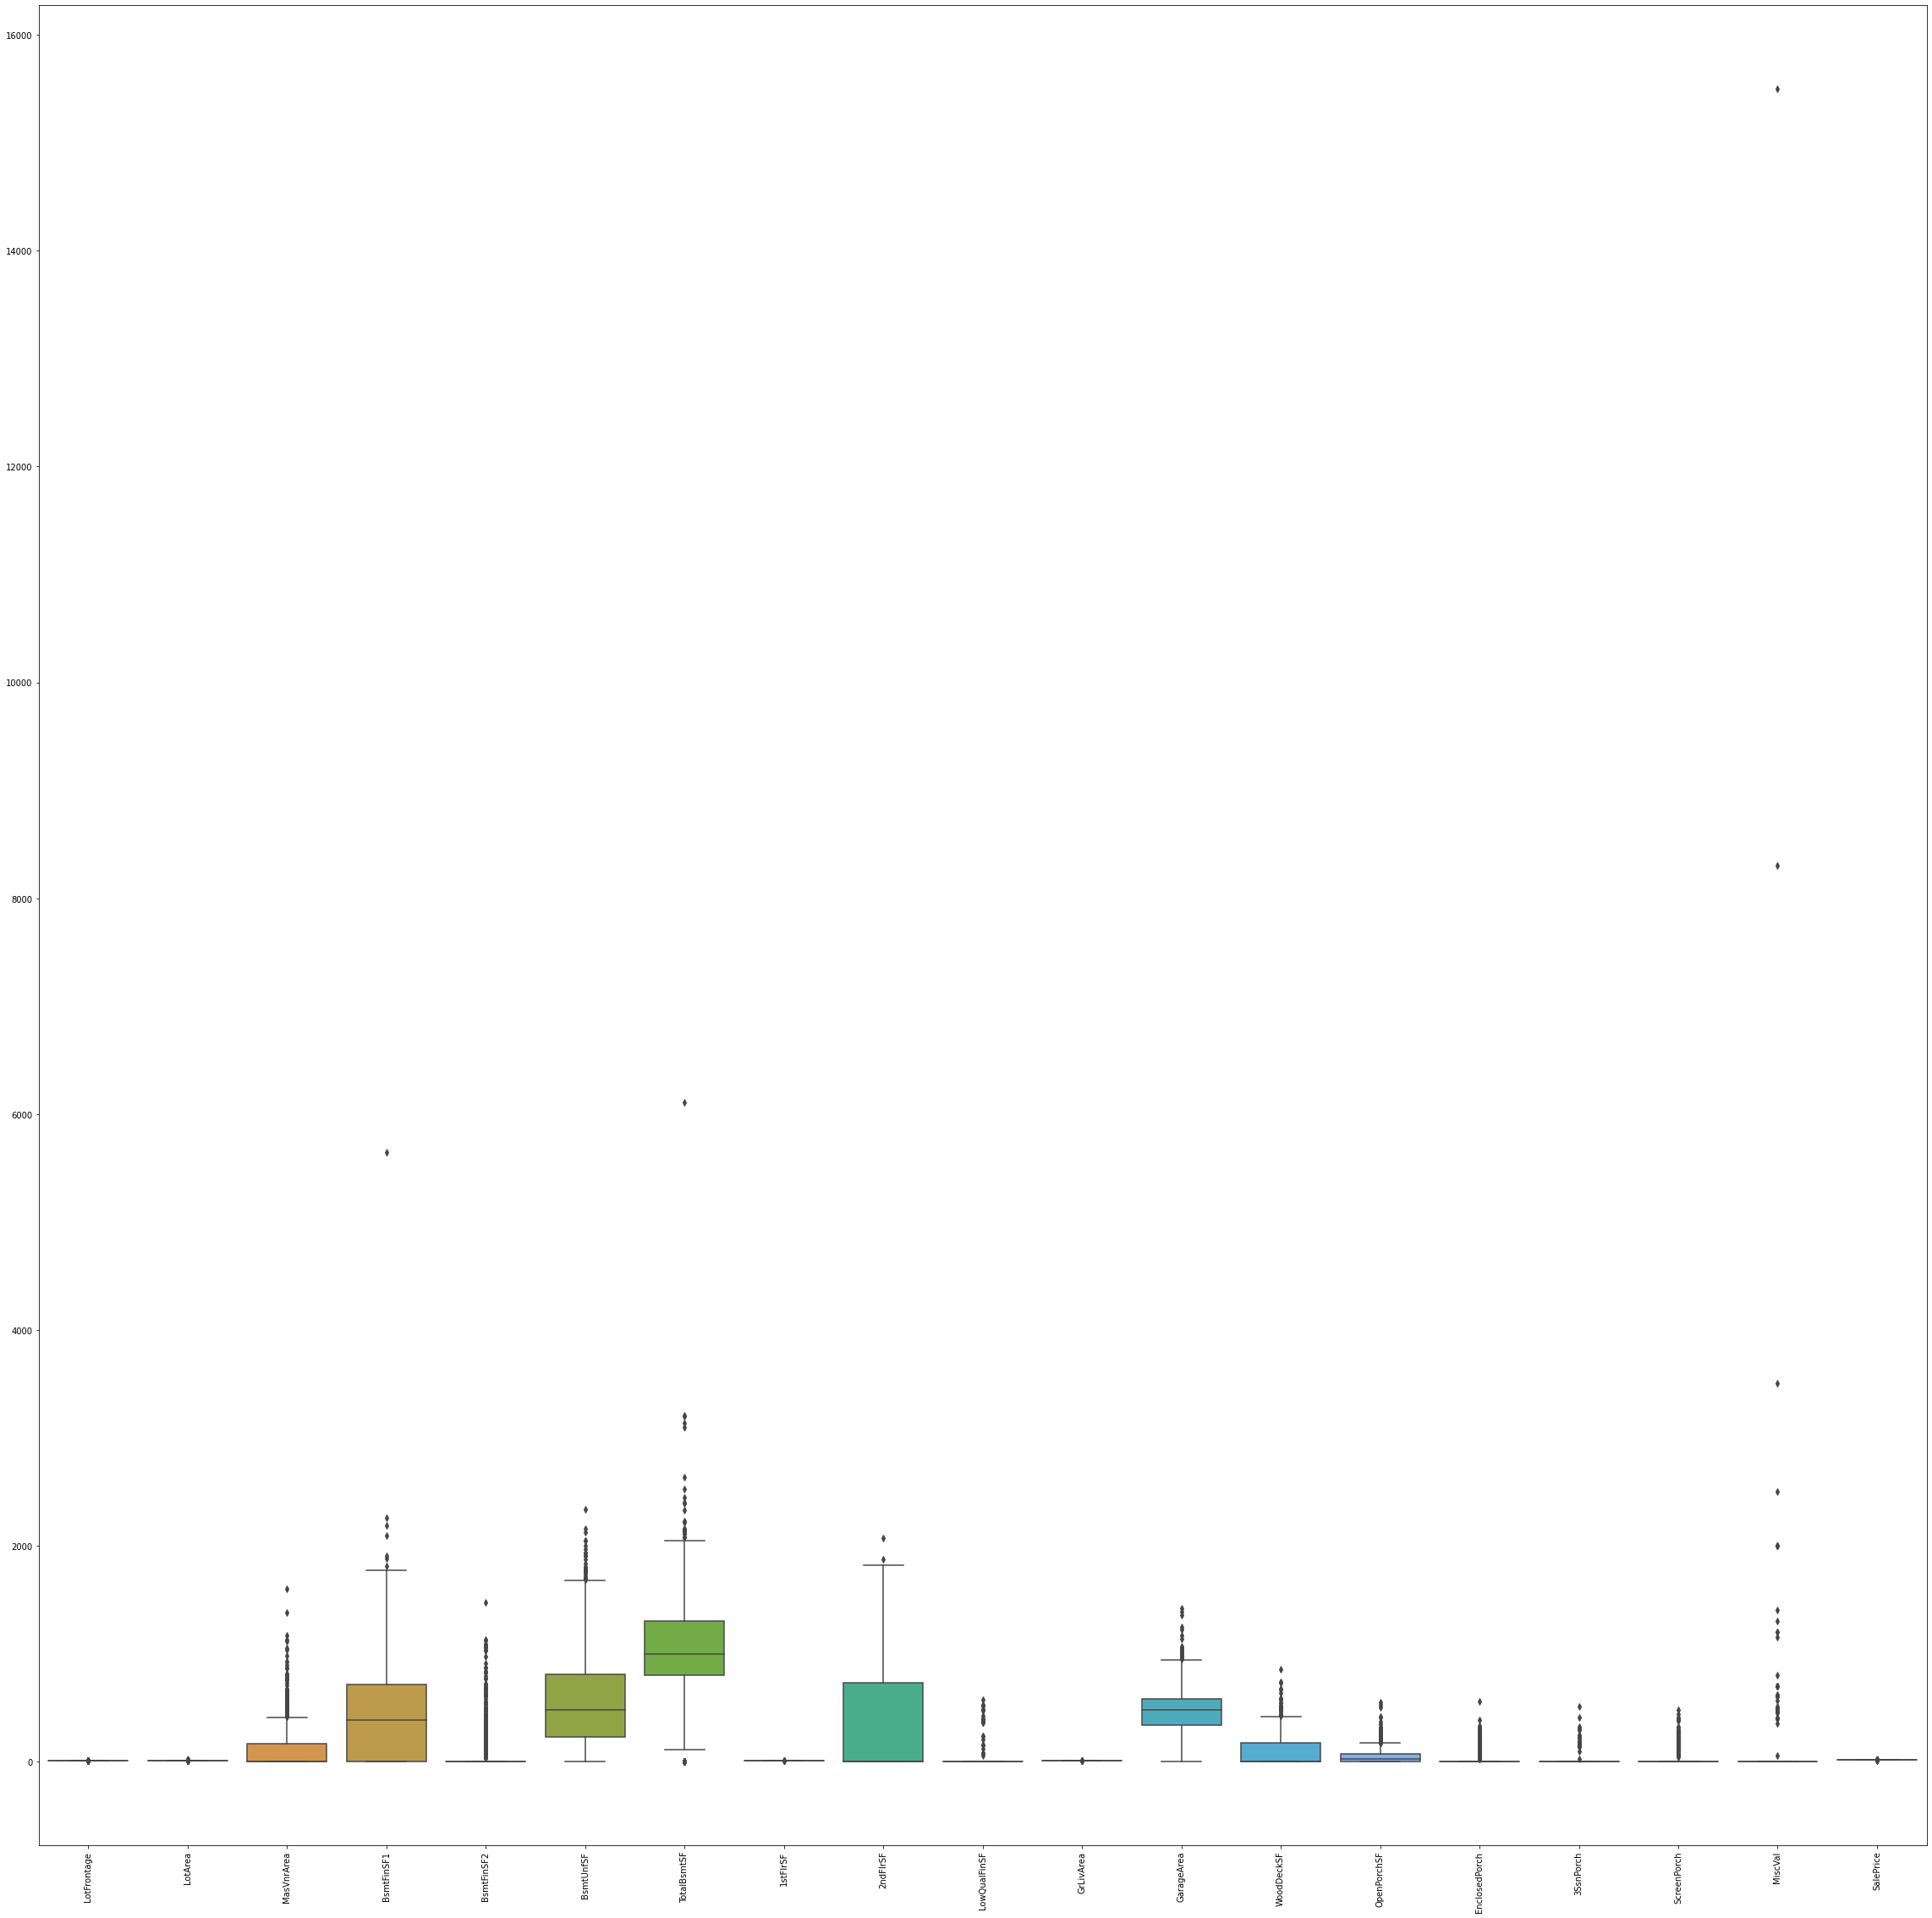

In [85]:
plt.figure(figsize=(40,40))
sns.boxplot(data=dataset[cont_data])
plt.xticks(rotation=90)
plt.show()

In [86]:
#Now lets treat the outliers variable
def outliers_percent(x):                     #capping the outliers function
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [87]:
cont_data=dataset[cont_data].apply(outliers_percent)

In [88]:
cont_data

LotFrontage    LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        4.174387   9.041922      196.00      706.00        0.00     150.00   
1        4.382027   9.169518        0.00      978.00        0.00     284.00   
2        4.219508   9.328123      162.00      486.00        0.00     434.00   
3        4.094345   9.164296        0.00      216.00        0.00     540.00   
4        4.430817   9.565214      350.00      655.00        0.00     490.00   
5        4.442651   9.554993        0.00      732.00        0.00      64.00   
6        4.317488   9.218705      186.00     1369.00        0.00     317.00   
7        4.234107   9.247829      240.00      859.00       32.00     216.00   
8        3.931826   8.719317        0.00        0.00        0.00     952.00   
9        3.912023   8.911934        0.00      851.00        0.00     140.00   
10       4.248495   9.323669        0.00      906.00        0.00     134.00   
11       4.442651   9.386308      286.00      998.00        0.00     177.00   
12       4.234107   9.470240        0.00      737.00        0.00     175.00   
13       4.510860   9.273503      306.00        0.00        0.00    1494.00   
14       4.234107   9.298351      212.00      733.00        0.00     520.00   
15       3.931826   8.719317        0.00        0.00        0.00     832.00   
16       4.234107   9.327323      180.00      578.00        0.00     426.00   
17       4.276666   9.286468        0.00        0.00        0.00       0.00   
18       4.189655   9.524786        0.00      646.00        0.00     468.00   
19       4.248495   8.930626        0.00      504.00        0.00     525.00   
20       4.615121   9.562053      380.00        0.00        0.00    1158.00   
21       4.043051   8.915835        0.00        0.00        0.00     637.00   
22       4.317488   9.184202      281.00        0.00        0.00    1777.00   
23       3.784190   8.348538        0.00      840.00        0.00     200.00   
24       4.234107   9.017484        0.00      188.00      668.00     204.00   
25       4.700480   9.563108      640.00        0.00        0.00    1566.00   
26       4.094345   8.881836        0.00      234.00      486.00     180.00   
27       4.584967   9.348187      200.00     1218.00        0.00     486.00   
28       3.850148   9.700208        0.00     1277.00        0.00     207.00   
29       4.094345   8.752107        0.00        0.00        0.00     520.00   
30       3.912023   9.047821        0.00        0.00        0.00     649.00   
31       4.234107   9.052985        0.00        0.00        0.00    1228.00   
32       4.442651   9.310095        0.00        0.00        0.00    1234.00   
33       4.248495   9.264071        0.00     1018.00        0.00     380.00   
34       4.094345   8.897409      246.00     1153.00        0.00     408.00   
35       4.682131   9.504352      132.00        0.00        0.00    1117.00   
36       4.718499   9.292750        0.00        0.00        0.00    1097.00   
37       4.304065   9.051579      650.00     1213.00        0.00      84.00   
38       4.219508   8.977399        0.00      731.00        0.00     326.00   
39       4.174387   8.706159        0.00        0.00        0.00       0.00   
40       4.430817   9.066239      101.00      643.00        0.00     445.00   
41       4.744932   9.735365        0.00      967.00        0.00     383.00   
42       4.234107   9.124782        0.00      747.00       93.00       0.00   
43       4.234107   9.126959        0.00      280.00      491.00     167.00   
44       4.248495   8.980298        0.00      179.00      506.00     465.00   
45       4.110874   8.943506      412.00      456.00        0.00    1296.00   
46       3.871201   9.458918        0.00     1351.00        0.00      83.00   
47       4.430817   9.314340        0.00       24.00        0.00    1632.00   
48       3.496508   8.402007        0.00        0.00        0.00     736.00   
49       4.189655   8.954415        0.00      763.00    

In [89]:
cont_data.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

In [90]:
dataset.drop(columns=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],inplace=True)

In [91]:
dataset.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [92]:
#Now let's add the cont_data to dataset 
dataset= pd.concat([dataset,cont_data],axis=1)

In [93]:
dataset.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'Bs

In [94]:
#We have treated the outliers value also
#Now let's analyze the multi collinearity 
cr=dataset.corr()

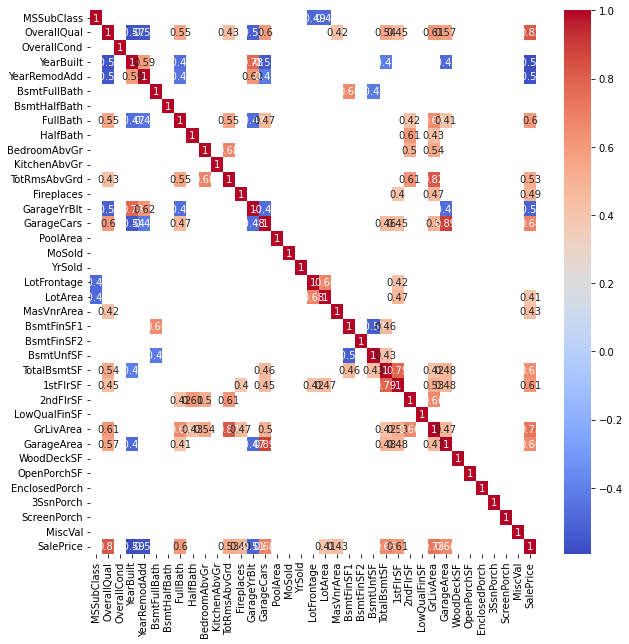

In [95]:
cr1=cr[abs(cr)>0.4]
plt.figure(figsize=(10,10))
sns.heatmap(cr1, annot=True, cmap="coolwarm")
plt.show()

In [96]:
#I am taking that variable which have correlation more than 0.4 because less then 0.4 is considered to be as a very weak correlation 
cr2=cr[abs(cr["SalePrice"])>0.4]

In [97]:
cr2

MSSubClass  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
OverallQual     0.032628     1.000000    -0.091932  -0.572629     -0.552570   
YearBuilt      -0.028746    -0.572629     0.377325   1.000000      0.594195   
YearRemodAdd   -0.041968    -0.552570    -0.070931   0.594195      1.000000   
FullBath        0.131608     0.550600    -0.194149  -0.468403     -0.440413   
TotRmsAbvGrd    0.040380     0.427452    -0.057583  -0.096955     -0.194005   
Fireplaces     -0.045569     0.396765    -0.023820  -0.148544     -0.114158   
GarageYrBlt    -0.082451    -0.514933     0.308222   0.777960      0.617249   
GarageCars     -0.040110     0.600671    -0.185758  -0.538727     -0.423236   
LotArea        -0.485318     0.182265    -0.006859  -0.025251     -0.030880   
MasVnrArea      0.021408     0.418403    -0.130299  -0.324220     -0.183505   
TotalBsmtSF    -0.252805     0.542601    -0.177540  -0.407072     -0.301798   
1stFlrSF       -0.289857     0.448880    -0.141215  -0.277826     -0.233266   
GrLivArea       0.083297     0.606353    -0.110111  -0.236353     -0.311845   
GarageArea     -0.101898     0.567669    -0.149615  -0.485643     -0.378165   
SalePrice      -0.077922     0.818266    -0.043428  -0.594238     -0.573719   

              BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
OverallQual       0.111098     -0.040150  0.550600  0.273458      0.101676   
YearBuilt        -0.184362      0.036060 -0.468403 -0.242728      0.068960   
YearRemodAdd     -0.115183      0.009346 -0.440413 -0.184034      0.038273   
FullBath         -0.064512     -0.054536  1.000000  0.136381      0.363252   
TotRmsAbvGrd     -0.053275     -0.023836  0.554784  0.343415      0.676620   
Fireplaces        0.137928      0.028976  0.243671  0.203649      0.107570   
GarageYrBlt      -0.115395      0.072735 -0.467162 -0.189782      0.058071   
GarageCars        0.131881     -0.020891  0.469672  0.219178      0.086106   
LotArea           0.125375      0.042059  0.179527  0.045702      0.291466   
MasVnrArea        0.090170      0.026645  0.274826  0.202191      0.103620   
TotalBsmtSF       0.303557      0.001674  0.330004 -0.061971      0.051362   
1stFlrSF          0.240342      0.012338  0.366887 -0.144460      0.148234   
GrLivArea         0.016133     -0.021431  0.656022  0.434171      0.537958   
GarageArea        0.177521     -0.023347  0.413421  0.165090      0.069873   
SalePrice         0.239607     -0.009406  0.596041  0.314729      0.204905   

              KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
OverallQual      -0.183882      0.427452    0.396765    -0.514933    0.600671   
YearBuilt         0.175918     -0.096955   -0.148544     0.777960   -0.538727   
YearRemodAdd      0.151671     -0.194005   -0.114158     0.617249   -0.423236   
FullBath          0.133115      0.554784    0.243671    -0.467162    0.469672   
TotRmsAbvGrd      0.256045      1.000000    0.326114    -0.141206    0.362289   
Fireplaces       -0.123936      0.326114    1.000000    -0.044231    0.300789   
GarageYrBlt       0.106979     -0.141206   -0.044231     1.000000   -0.475728   
GarageCars       -0.050634      0.362289    0.300789    -0.475728    1.000000   
LotArea           0.004248      0.371188    0.318746     0.016813    0.279754   
MasVnrArea       -0.038275      0.287378    0.252409    -0.253641    0.375398   
TotalBsmtSF      -0.071181      0.269710    0.331650    -0.318932    0.456100   
1stFlrSF          0.075780      0.396181    0.400504    -0.211438    0.449580   
GrLivArea         0.114460      0.824932    0.468043    -0.236304    0.496117   
GarageArea       -0.064378      0.337069    0.267933    -0.473767    0.891051   
SalePrice        -0.151710      0.532018    0.492223    -0.505717    0.683831   

              PoolArea    MoSold    YrSold  LotFrontage   LotArea  MasVnrArea  \
OverallQual   0.065166  0.070815 -0.027347     0.199663  0.182265    0.418403   
YearBuilt    -0.007563 -0.018777  0.05750

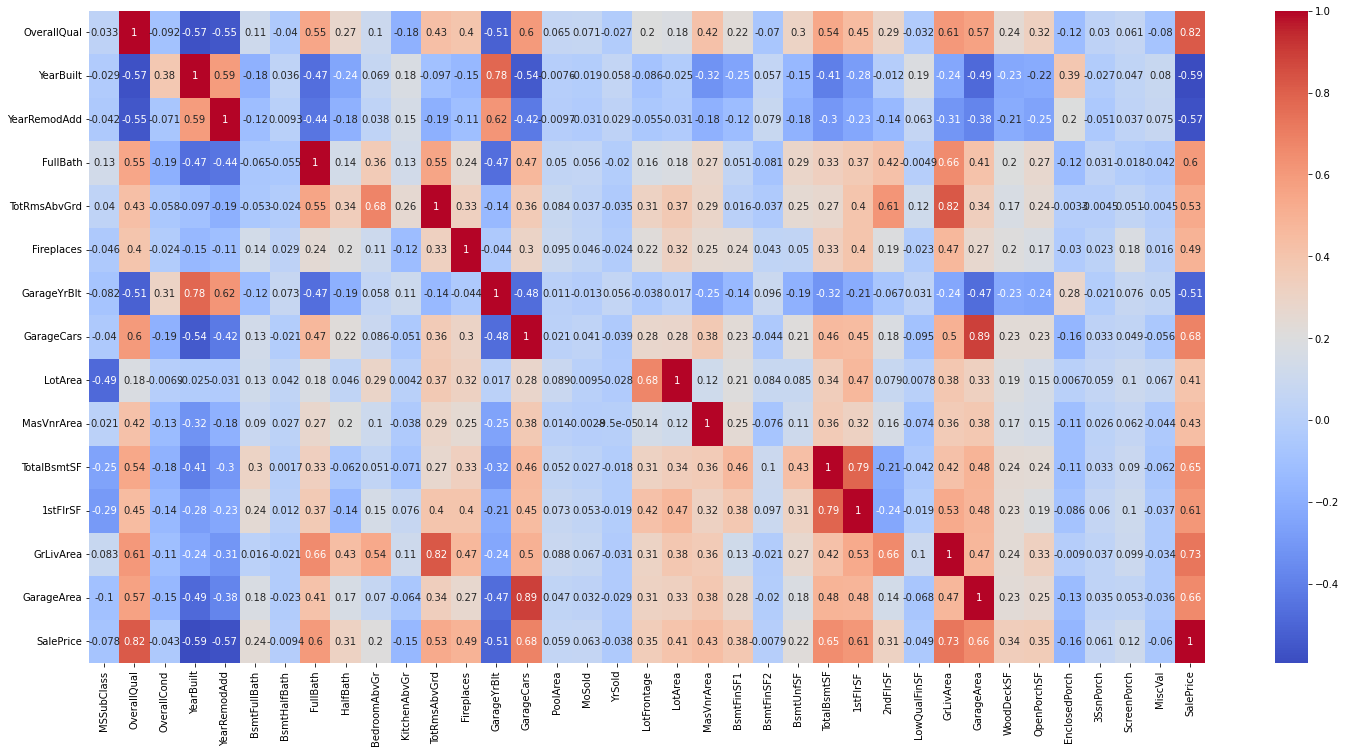

In [98]:
plt.figure(figsize=(25,12))
sns.heatmap(cr2,annot=True, cmap="coolwarm")
plt.show()

In [99]:
# GarageArea" and "GarageCars"
# "1stFlrSF" and "TotalBsmtSF"
# "TotRmsAbvGrd" and "GrLivArea"
# "GarageYearbuilt" and "YearBuilt"
#These are the variable with high correlation hence dropping the one variable from each set 
#We will drop "GarageArea", "1stFlrSF", "TotRmsAbvGrd", "GarageYrBlt" 
dataset.drop(columns=["GarageArea", "1stFlrSF", "TotRmsAbvGrd", "GarageYrBlt"],inplace=True)

##### Label Encoding

In [100]:
for feature in cat_data:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [101]:
dataset.head(20)

MSSubClass  MSZoning  Street  Alley  LotShape  LandContour  Utilities  \
0           60         3       1      2         0            1          1   
1           20         3       1      2         0            1          1   
2           60         3       1      2         1            1          1   
3           70         3       1      2         1            1          1   
4           60         3       1      2         1            1          1   
5           50         3       1      2         1            1          1   
6           20         3       1      2         0            1          1   
7           60         3       1      2         1            1          1   
8           50         1       1      2         0            1          1   
9          190         3       1      2         0            1          1   
10          20         3       1      2         0            1          1   
11          60         3       1      2         1            1          1   
12          20         3       1      2         3            1          1   
13          20         3       1      2         1            1          1   
14          20         3       1      2         1            1          1   
15          45         1       1      2         0            1          1   
16          20         3       1      2         1            1          1   
17          90         3       1      2         0            1          1   
18          20         3       1      2         0            1          1   
19          20         3       1      2         0            1          1   

    LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0           0          0            15           3           4         3   
1           2          0            20           2           4         3   
2           0          0            15           3           4         3   
3           1          0            17           3           4         3   
4           2          0            24           3           4         3   
5           0          0            11           3           4         3   
6           0          0            19           3           4         3   
7           1          0            13           7           4         3   
8           0          0             4           0           4         3   
9           1          0             3           0           1         0   
10          0          0             6           3           4         3   
11          0          0            23           3           4         3   
12          0          0             6           3           4         3   
13          0          0            15           3           4         3   
14          1          0            10           3           4         3   
15          1          0             3           3           4         3   
16          4          0            10           3           4         3   
17          0          0             6           3           4         2   
18          0          0            12           1           4         3   
19          0          0            10           3           4         3   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0            6            7            5          5             5          1   
1            4            6            8         31            31          1   
2            6            7            5          7             6          1   
3            6            7            5         91            36          1   
4            6            8            5          8             8          1   
5            2            5            5         16            14          1   
6            4            8            5          3             2          1   
7            6            7            6         36            36          1   
8            2            7            5         77            58    

In [102]:
x= dataset.drop(columns=["SalePrice"])
y=dataset["SalePrice"]


###### Feature Scaling

In [103]:
min_scale= MinMaxScaler()
x1=min_scale.fit_transform(x)

In [104]:
x=pd.DataFrame(x1,columns=x.columns)

In [105]:
#As such I was getting an error while fitting the target variable into cross validation as such it can accept the multiclass or
#binary but my y variable was continous hence I transformed it to multiclass using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#checking the type of y variable
type_of_target(y)

'multiclass'

##### Train_test_split

In [106]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, random_state=0)

In [107]:
#I am also using stratified k-fold cross validation which I will basically use under grid search under cv
skf=StratifiedKFold(n_splits=3, shuffle=True,random_state=17)

##### Feature Selection

In [108]:
var=VarianceThreshold(threshold=0)
var.fit(x_train,y_train)

VarianceThreshold(threshold=0)

In [109]:
non= [feat for feat in x.columns if feat not in x.columns[var.get_support()]]
non

[]

In [110]:
#It means we do not have any constant variable and there are no variable with the low variance

In [111]:
#Now I will use Lasso to check the important features
feature_sel_model = SelectFromModel(Lasso(alpha=0.003, random_state=0))#The bigger the alpha the less features that will be selected. 
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.003, random_state=0))

In [112]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]

In [113]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
 

In [114]:
x_train=x_train[selected_feat]


In [157]:
#Gradient Boosting Regressor
para_grid = {'loss': ["squared_error", "absolute_error"],
               'learning_rate':[10 ** x for x in range(-3, 3)] ,
               "n_estimators": [100, 200, 400, 600, 800],
               'min_samples_split': [2, 5, 10,14],
               'min_samples_leaf': [1, 2, 4,6,8],
              'max_depth':[int(x) for x in np.linspace(10, 1000,10)],
               "max_features":["auto", "sqrt", "log2"],
               "criterion":["friedman_mse", "squared_error"]}
gd=GradientBoostingRegressor()
rf_randomcv=RandomizedSearchCV(estimator=gd,param_distributions=para_grid,n_iter=100,cv=skf,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
                   estimator=GradientBoostingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10, 100],
                                        'loss': ['squared_error',
                                                 'absolute_error'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800]},
                   random_state=100, verbose=2)

In [158]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'loss': 'squared_error',
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}

In [159]:
gd1=GradientBoostingRegressor(n_estimators= 800,
 min_samples_split=14,
 min_samples_leaf= 2,
 max_features= 'log2',
 max_depth= 10,
 loss= 'squared_error',
 learning_rate= 0.01,
 criterion='friedman_mse')

In [160]:
gd1.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, max_features='log2',
                          min_samples_leaf=2, min_samples_split=14,
                          n_estimators=800)

In [161]:
pred_train_gd1= gd1.predict(x_train)
pred_test_gd1=gd1.predict(x_test)

In [162]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, pred_train_gd1)
print(model_train_mae)
print(model_train_rmse)
print(model_train_r2)

4.3170423886867875
6.083187881042395
0.9987184259606423


In [163]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, pred_test_gd1)
print(model_test_mae)
print(model_test_rmse)
print(model_test_r2)

33.355647117372385
47.00567450847534
0.9216334791121709


###### GridSearchCV

In [123]:
param= {'n_estimators': [600,700,800,900,1000],
       'min_samples_split':[12,13,14,15,16],
       'min_samples_leaf':[2,4,6],
       'max_features':['log2'],
       'max_depth':[10],
       'loss':['squared_error'],
       'criterion': ['friedman_mse'],
       'learning_rate': [0.01]}
gd2=GradientBoostingRegressor()
grid_search=GridSearchCV(estimator=gd2,param_grid=param,cv=skf,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'learning_rate': [0.01],
                         'loss': ['squared_error'], 'max_depth': [10],
                         'max_features': ['log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             verbose=2)

In [124]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 16,
 'n_estimators': 1000}

In [125]:
gd2=GradientBoostingRegressor(criterion= 'friedman_mse',
 learning_rate= 0.01,
 loss= 'squared_error',
 max_depth= 10,
 max_features= 'log2',
 min_samples_leaf= 6,
 min_samples_split= 16,
 n_estimators= 1000)

In [126]:
gd2.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, max_features='log2',
                          min_samples_leaf=6, min_samples_split=16,
                          n_estimators=1000)

In [127]:
pred_train_gd= gd2.predict(x_train)
pred_test_gd=gd2.predict(x_test)


In [128]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [129]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, pred_train_gd)
print(model_train_mae)
print(model_train_rmse)
print(model_train_r2)

6.653484600764143
9.650066109116365
0.9967749101494225


In [130]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, pred_test_gd)
print(model_test_mae)
print(model_test_rmse)
print(model_test_r2)

32.88654499310476
46.889385409931194
0.9220207472220927


##### XGBREGRESSOR

In [131]:
para_grid = {'max_depth':  [3, 18, 1],
        'gamma':[1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' :  [0,1],
        'colsample_bytree' :[0.5,1],
        'min_child_weight' :[0, 10, 1],
        'n_estimators': [180]}
xgb=XGBRegressor()
xgb_randomcv=RandomizedSearchCV(estimator=xgb,param_distributions=para_grid,n_iter=100,cv=skf,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
xgb_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interac...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 1],
                                        'gamma': [1, 9],
                                        'max_depth': [3, 18, 1],
                                        'min_child_weight': [0, 10, 1],
                                        'n_estimators': [180],
                                        'reg_alpha': [40, 180, 1],
                                        'reg_lambda': [0, 1]},
                   random_state=100, verbose=2)

In [132]:
xgb_randomcv.best_params_

{'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 180,
 'min_child_weight': 0,
 'max_depth': 3,
 'gamma': 9,
 'colsample_bytree': 1}

In [133]:
xgb1=XGBRegressor(reg_lambda=1,
 reg_alpha= 1,
 n_estimators=180,
 min_child_weight=0,
 max_depth=3,
 gamma=9,
 colsample_bytree= 1)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=9, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=0,
             missing=nan, monotone_constraints='()', n_estimators=180, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=1, ...)

In [134]:
pred_train_xgb=xgb1.predict(x_train)
pred_test_xgb=xgb1.predict(x_test)

In [135]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, pred_train_xgb)
print(model_train_mae)
print(model_train_rmse)
print(model_train_r2)

10.3479636999434
13.61196165050521
0.9935831383598163


In [136]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, pred_test_xgb)
print(model_test_mae)
print(model_test_rmse)
print(model_test_r2)

36.878858370487
51.518971470216364
0.9058621323227986


In [137]:
xgb2=XGBRegressor(reg_lambda=2000,
 reg_alpha= 2050,               
 n_estimators=300,
 min_child_weight=23,
 max_depth=100,
 gamma=12,
 colsample_bytree= 1)
xgb2.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=12, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=23,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=2050, reg_lambda=2000, ...)

In [138]:
pred_train_xgb1=xgb2.predict(x_train)
pred_test_xgb1=xgb2.predict(x_test)

In [139]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, pred_train_xgb1)
print(model_train_mae)
print(model_train_rmse)
print(model_train_r2)

29.765989150576395
40.448608480614965
0.9433384549766893


In [140]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, pred_test_xgb1)
print(model_test_mae)
print(model_test_rmse)
print(model_test_r2)

38.24300213088728
51.93789909164008
0.90432493959257


In [141]:
#I will now use the hyperopt to check it
space = {'max_depth': hp.choice("max_depth", [3, 18, 20,22,30,50,100,120]),
        'gamma': hp.choice('gamma', [1,9,20,30,35,40,50]),
        'reg_alpha' : hp.choice('reg_alpha', [2000,2050,3000,3050,4000]),
        'reg_lambda' : hp.choice('reg_lambda', [1050,2000,2050,3000,3050,4000,4050]),
        'colsample_bytree' : hp.choice('colsample_bytree', [0.5,1]),
        'min_child_weight' : hp.choice('min_child_weight', [0, 10, 1,23,40,30,50]),
        'n_estimators': hp.choice('n_estimators',[180,200,300,400,500,600,700])}
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x2082de68fd0>,
 'gamma': <hyperopt.pyll.base.Apply at 0x2082db0dd00>,
 'reg_alpha': <hyperopt.pyll.base.Apply at 0x2082e452dc0>,
 'reg_lambda': <hyperopt.pyll.base.Apply at 0x2082e046880>,
 'colsample_bytree': <hyperopt.pyll.base.Apply at 0x2082d906910>,
 'min_child_weight': <hyperopt.pyll.base.Apply at 0x2082e253d00>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x2082e2538e0>}

In [142]:
def objective(space):
    model_xgb = XGBRegressor(max_depth = space['max_depth'],
                                 gamma = space['gamma'],
                                 reg_alpha = space['reg_alpha'],
                                 reg_lambda = space['reg_lambda'],
                                 colsample_bytree= space['colsample_bytree'],
                                 min_child_weight= space['min_child_weight'],
                                 n_estimators= space['n_estimators']
                                 )
    
    accuracy = cross_val_score(model_xgb, x_train, y_train, cv = 3).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [143]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 9,
            trials= trials)
best

100%|█████████████████████████████████████████████████| 9/9 [00:13<00:00,  1.51s/trial, best loss: -0.9006068422181807]


{'colsample_bytree': 0,
 'gamma': 1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 6,
 'reg_alpha': 1,
 'reg_lambda': 4}

In [144]:
depth={0:3, 1:18, 2:20,3:22,4:30,5:50,6:100,7:120}
gama={0:1,1:9,2:20,3:30,4:35,5:40,6:50}
alpha={0:2000,1:2050,2:3000,3:3050,4:4000}
lamda={0:1050,1:2000,2:2050,3:3000,4:3050,5:4000,6:4050}
bytree={0:0.5,1:1}
child={0:0, 1:10, 2:1,3:23,4:40,5:30,6:50}
est={0:180,1:200,2:300,3:400,4:500,5:600,6:700}

print(depth[best['max_depth']])
print(gama[best['gamma']])
print(alpha[best['reg_alpha']])
print(lamda[best['reg_lambda']])
print(bytree[best['colsample_bytree']])
print(child[best['min_child_weight']])
print(est[best['n_estimators']])

30
9
2050
3050
0.5
23
700


In [145]:
hyper_xgb = XGBRegressor(max_depth= depth[best['max_depth']], 
                                       gamma = gama[best['gamma']], 
                                       reg_alpha = alpha[best['reg_alpha']], 
                                       reg_lambda = lamda[best['reg_lambda']], 
                                       colsample_bytree = bytree[best['colsample_bytree']],min_child_weight=child[best['min_child_weight']],
                                       n_estimators=est[best['n_estimators']]).fit(x_train,y_train)

In [164]:
hyper_xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=9, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=23,
             missing=nan, monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=2050, reg_lambda=3050, ...)

In [146]:
pred_train_xgb3=hyper_xgb.predict(x_train)
pred_test_xgb3=hyper_xgb.predict(x_test)

In [147]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, pred_train_xgb3)
print(model_train_mae)
print(model_train_rmse)
print(model_train_r2)

29.502020402531645
40.195439912712516
0.9440455265019065


In [148]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, pred_test_xgb3)
print(model_test_mae)
print(model_test_rmse)
print(model_test_r2)

37.34530432926466
51.75812690728096
0.9049861118112957


##### RandomForest 

In [149]:
para_grid = {'max_depth':  [3, 18, 1],
             'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10]}
rand=RandomForestRegressor()
rand_randomcv=RandomizedSearchCV(estimator=rand,param_distributions=para_grid,n_iter=100,cv=skf,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rand_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=17, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 18, 1],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400]},
                   random_state=100, verbose=2)

In [150]:
rand_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 18}

In [151]:
rforest=RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=2000, min_samples_split=10, min_samples_leaf=7)
rforest.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=10, n_estimators=2000)

In [152]:
pred_train_rf=rforest.predict(x_train)
pred_test_rf=rforest.predict(x_test)

In [153]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, pred_train_rf)
print(model_train_mae)
print(model_train_rmse)
print(model_train_r2)

34.42122297654098
46.1097203673593
0.9263680642005777


In [154]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, pred_test_rf)
print(model_test_mae)
print(model_test_rmse)
print(model_test_r2)

39.370747030466724
54.51836782900737
0.8945817798442453


In [173]:
models= {'GradientBoosting_randomcv':GradientBoostingRegressor(n_estimators= 800,min_samples_split=14,min_samples_leaf= 2, max_features= 'log2',max_depth= 10,loss= 'squared_error',learning_rate= 0.01,criterion='friedman_mse'),
         'GradientBoosting_gridcv':GradientBoostingRegressor(n_estimators= 2500,min_samples_split=100,min_samples_leaf= 100, max_features='log2', max_depth= 100,loss= 'squared_error',learning_rate= 0.01,criterion='friedman_mse'),
         'xgb_randomcv':XGBRegressor(reg_lambda=1,reg_alpha= 1,n_estimators=180,min_child_weight=0,max_depth=3,gamma=9,colsample_bytree= 1),
         'xgb2':xgb2,
         'xgb_hyper':XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,colsample_bylevel=1, colsample_bynode=1,reg_alpha=2050, reg_lambda=3050, min_child_weight=23, colsample_bytree=0.5, gamma=9, learning_rate=0.300000012, max_depth=30, n_estimators=700),
         'RandomForest':RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=2000, min_samples_split=10, min_samples_leaf=7)}

In [179]:
# Setting mlflow server
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('House_price_pred_V5')

<Experiment: artifact_location='mlflow-artifacts:/942357381006822671', creation_time=1688456374335, experiment_id='942357381006822671', last_update_time=1688456374335, lifecycle_stage='active', name='House_price_pred_V5', tags={}>

In [180]:
def mlflow_algorithm2(models):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train,y_train)
    
        # Make predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        #y_pred_prob = model.predict_proba(X_test)
    
        # Training set performances
        model_train_r2 = r2_score(y_train,y_train_pred)
        model_train_explained_variance_score = explained_variance_score(y_train,y_train_pred)
        model_train_rmse = rmse(y_train,y_train_pred)
        #model_train_adjusted_r_squared = r2_score(y_train,y_train_pred,adjusted=True)
    
       # Test set performances
        model_test_r2 = r2_score(y_test,y_test_pred)
        model_test_explained_variance_score = explained_variance_score(y_test,y_test_pred)
        model_test_rmse = rmse(y_test,y_test_pred)
        #model_test_adjusted_r_squared = r2_score(y_test,y_test_pred,adjusted=True)
    
        print(list(models.keys())[i])
    
        print('Model performance for Training set')
    
        print('-R2 : {}'.format(model_train_r2))
        print('-Variance Score : {}'.format(model_train_explained_variance_score))
        print('-RMSE : {}'.format(model_train_rmse))
        #print('-Adjusted R2 : {.4f}'.format(model_train_adjusted_r_squared))
    
        print('-'*25)
    
        print('Model performance for Test set')
    
        print('-R2 : {}'.format(model_test_r2))
        print('-Variance Score : {}'.format(model_test_explained_variance_score))
        print('-RMSE : {}'.format(model_test_rmse))
        #print('-Adjusted R2 : {.4f}'.format(model_test_adjusted_r_squared))
    
        print('='*35)
        print('\n')
        
        mlflow.set_tracking_uri('http://127.0.0.1:5000')
        mlflow.set_experiment('House_price_pred_V5')
        
        with mlflow.start_run(run_name=list(models.keys())[i]):
            mlflow.sklearn.log_model(model, list(models.keys())[i])
            #mlflow.set_tag("run_name", list(models.keys())[i])
    
            mlflow.log_metric("R2_Train",model_train_r2)
            mlflow.log_metric("rmse_Train",model_train_rmse)
    
            mlflow.log_metric("R2_Test",model_test_r2)
            mlflow.log_metric("rmse_Test",model_test_rmse)
        mlflow.end_run()

In [181]:
mlflow_algorithm2(models)

GradientBoosting_randomcv
Model performance for Training set
-R2 : 0.9987388720912019
-Variance Score : 0.9987388720912019
-RMSE : 6.034467430759745
-------------------------
Model performance for Test set
-R2 : 0.9240802300683247
-Variance Score : 0.9241359365716273
-RMSE : 46.26605261288293


GradientBoosting_gridcv
Model performance for Training set
-R2 : 0.9574668887590718
-Variance Score : 0.9574668887590718
-RMSE : 35.04474911792074
-------------------------
Model performance for Test set
-R2 : 0.9081013617768318
-Variance Score : 0.9081558683472668
-RMSE : 50.90255052901305


xgb_randomcv
Model performance for Training set
-R2 : 0.9935831383598163
-Variance Score : 0.9935831388128484
-RMSE : 13.61196165050521
-------------------------
Model performance for Test set
-R2 : 0.9058621323227986
-Variance Score : 0.9059208333457949
-RMSE : 51.518971470216364


xgb2
Model performance for Training set
-R2 : 0.9433384549766893
-Variance Score : 0.9433940709890763
-RMSE : 40.4486084806149

In [187]:
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'num_leaves':[6,10,12], 'bagging_fraction': [0.7],
                                   'bagging_freq':[4,8,12,20], 'min_sum_hessian_in_leaf':[11,13,15,17],
                                   'learning_rate':[0.01], 'n_estimators':[7500,10000,12000], 'max_bin':[2]}]

    clf = GridSearchCV(
        estimator=LGBMRegressor(), 
        param_grid=tuned_parameters, 
        scoring='accuracy',
        cv=skf,
        return_train_score=True,
        verbose=1
    )
    clf.fit(x_train, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be i

2023/07/04 13:50:29 WARNING mlflow.sklearn.utils: BaseSearchCV.score failed. The 'training_score' metric will not be recorded. Scoring error: Classification metrics can't handle a mix of multiclass and continuous targets


In [188]:
clf.best_params_

{'bagging_fraction': 0.7,
 'bagging_freq': 4,
 'learning_rate': 0.01,
 'max_bin': 2,
 'min_sum_hessian_in_leaf': 11,
 'n_estimators': 7500,
 'num_leaves': 6}

In [191]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Kanav")
    mlflow.set_tag("algo", "LGB")
    lgb= LGBMRegressor(bagging_fraction= 0.7,bagging_freq= 4,learning_rate=0.01,max_bin=2,min_sum_hessian_in_leaf= 11,n_estimators= 7500,num_leaves= 6)
    lgb.fit(x_train,y_train)
    y_train_pred = lgb.predict(x_train)
    y_test_pred = lgb.predict(x_test)
    model_train_r2 = r2_score(y_train,y_train_pred)
    model_train_explained_variance_score = explained_variance_score(y_train,y_train_pred)
    model_train_rmse = rmse(y_train,y_train_pred)
    model_test_r2 = r2_score(y_test,y_test_pred)
    model_test_explained_variance_score = explained_variance_score(y_test,y_test_pred)
    model_test_rmse = rmse(y_test,y_test_pred)
    mlflow.log_metric("R2_Train",model_train_r2)
    mlflow.log_metric("rmse_Train",model_train_rmse)
    
    mlflow.log_metric("R2_Test",model_test_r2)
    mlflow.log_metric("rmse_Test",model_test_rmse)
mlflow.end_run()
    

In [192]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
print(model_train_mae)
print(model_train_rmse)
print(model_train_r2)

65.23000698116182
84.93500598578197
0.7501641916316742


In [193]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
print(model_test_mae)
print(model_test_rmse)
print(model_test_r2)

87.98795011821541
111.6737943606795
0.5576841180806869
